In [483]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np

In [484]:
filename = "finantier_ds_technical_test_dataset.csv"
df = pd.read_csv(filename, index_col = False)


# Cleaning the data
A cursory look at the dataset suggests that customerID is the primary key, gender, Senior Citizen, Partner, Dependents, PhoneService, InternetService, TechSupport, StreamingTV and StreamingMovies are categorical variables that should be non-null. PhoneService and MultipleLines are correlated, as are InternetService, OnlineSecurity and DeviceProtection and other internet-dependent services in the same way, as are Contract, PaperlessBilling, PaymentMethod and MonthlyCharges. But because all members should be on contract (since we're doing default prediction), all customers should be on contract. So that column should not be null either. 

These create the following constraints:
1. All columns should be non-null, except for MultipleLines - which are null when PhoneService is No, OnlineSecurity and DeviceProtection - which are null when InternetService is No.
2. All columns should take their valid values: gender should only have Male and Female etc.

We can now check for these constraints and fix (if possible) or remove rows that violate these constraints. We should also check for empty strings and replace them with NaN values.



In [485]:
df = df.replace(' ', np.nan)

In [486]:
'''
remove all rows with NaN customerID, gender, senior citizen, dependents, 
tenure, contract, paperlessBilling, PaymentMethod, MonthlyCharges, 
TotalCharges, Default
'''
df = df.dropna(subset=['customerID', 
                      'gender', 
                      'SeniorCitizen', 
                      'Partner',
                      'Dependents', 
                      'tenure',
                      'Contract',
                      'PaperlessBilling',
                      'PaymentMethod',
                      'MonthlyCharges',
                      'TotalCharges',
                      'Default'])

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
1,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7044,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7045,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7046,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [487]:
'''
Check if correlations are true. 
e.g. if MultipleLines says 'no phone service', then phoneService should be 'No'
'''

# phoneService dependent columns
df.drop(df[(df['PhoneService'] == "Yes") & (df['MultipleLines'] == "No phone service")
  | (df["InternetService"] == "Yes") & (
      (df["OnlineSecurity"] == "No internet service")
      | (df["OnlineSecurity"] == "No internet service")
      | (df["DeviceProtection"] == "No internet service")
      | (df["TechSupport"] == "No internet service")
      | (df["StreamingTV"] == "No internet service")
      | (df["StreamingMovies"] == "No internet service"))].index)
      

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
1,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7044,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7045,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7046,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


At this point, we can convert the categorical variables into categorical encodings. 

In [488]:
# convert string columns to numeric if needed
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'])

# convert senior citizen to categorical
df = df.astype({"SeniorCitizen": 'object'})

# convert categorical columns to numbers
cat_columns = df.select_dtypes(['object']).columns
cat_columns
df[cat_columns] = df[cat_columns].apply(lambda x : x.astype('category').cat.codes)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
1,5365,0,0,1,0,1.0,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
2,3953,1,0,0,0,34.0,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
3,2558,1,0,0,0,2.0,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
4,5524,1,0,0,0,45.0,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
5,6500,0,0,0,0,2.0,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,4843,1,0,1,1,24.0,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7044,1524,0,0,1,1,72.0,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7045,3358,0,0,1,1,11.0,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7046,5923,1,1,1,0,4.0,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


# Investigating the data
## Descriptive statistics

In [489]:
# descriptive statistics
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3515.500000,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,...,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,2030.107879,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,...,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1757.750000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,3515.500000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,5273.250000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,7031.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<Figure size 432x288 with 0 Axes>

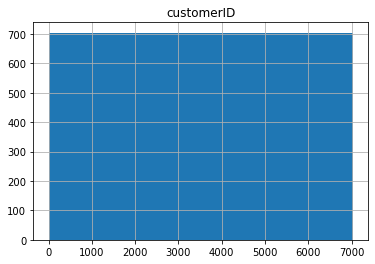

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

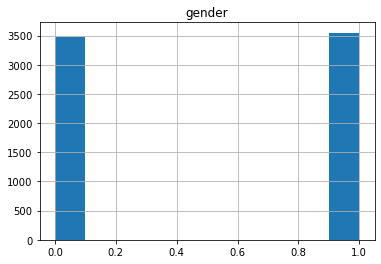

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

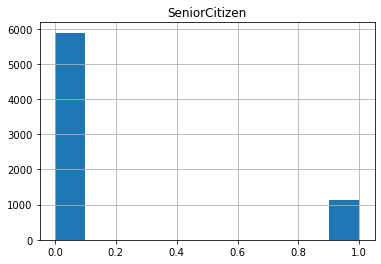

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

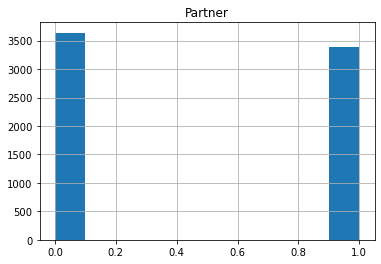

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

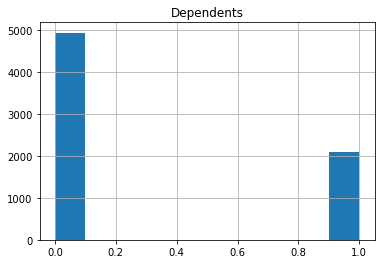

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

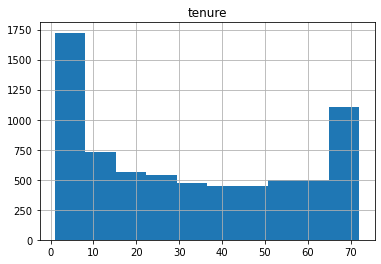

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

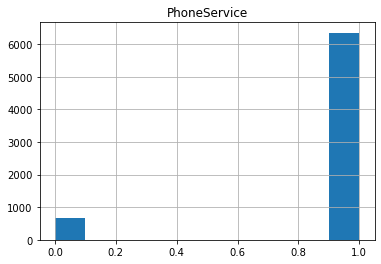

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

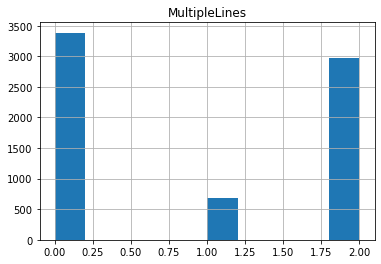

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

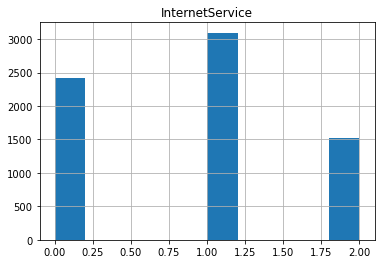

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

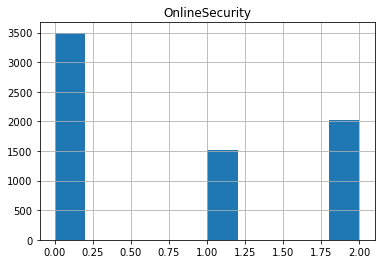

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

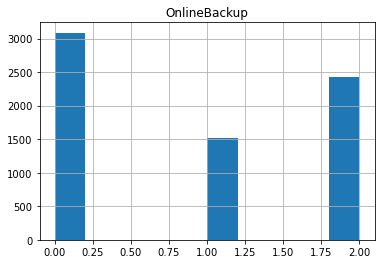

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

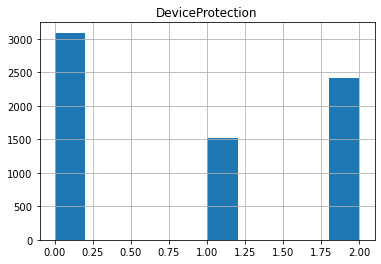

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

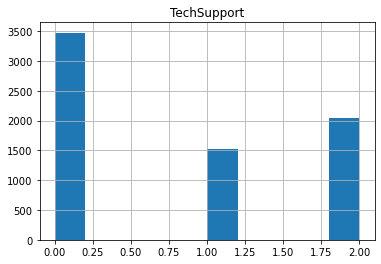

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

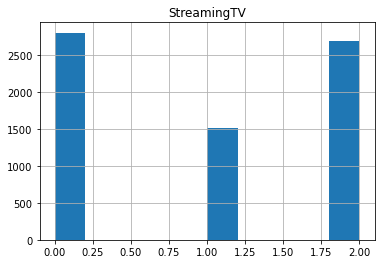

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

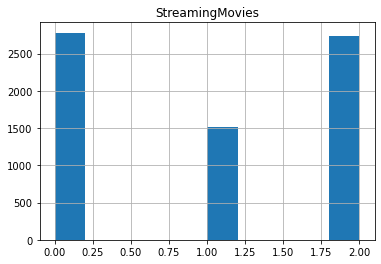

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

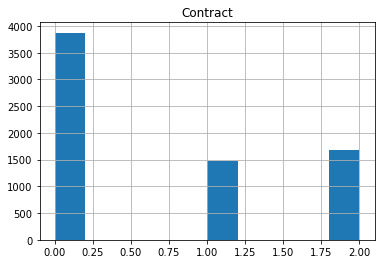

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

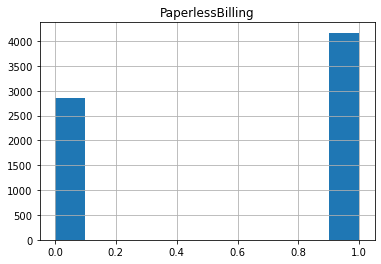

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

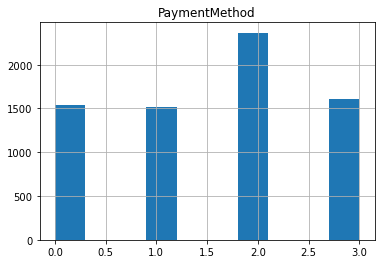

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

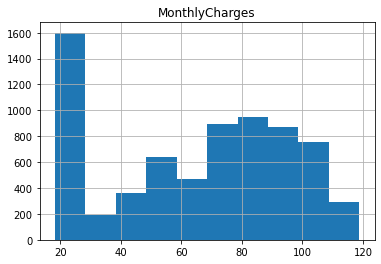

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

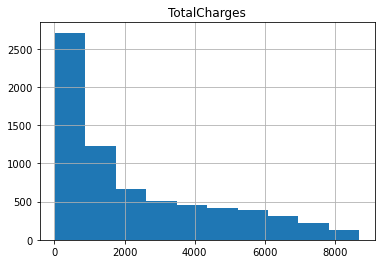

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

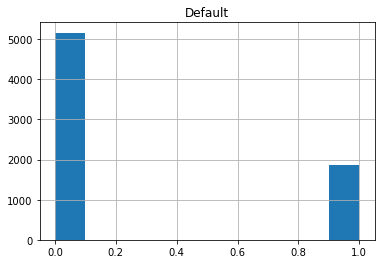

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
customerID,1.000000,0.006235,-0.002368,-0.026509,-0.011871,0.007209,-0.006987,0.004497,-0.012335,0.013740,-0.002960,-0.006726,0.001763,-0.007650,-0.017207,0.015949,-0.002225,0.011754,-0.004445,-0.000263,-0.017858
gender,0.006235,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.002368,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.026509,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,-0.011871,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.007209,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.006987,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,0.004497,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.012335,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,0.013740,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050


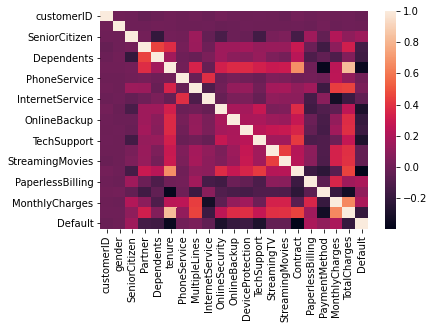

In [611]:
# histograms
for col in df:
    plt.figure()
    df[[col]].hist()
    plt.show()
    plt.clf()
    
# pairwise correlation
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
corr_matrix

In [610]:
pd.set_option("display.max_columns", None)

A look at the magnitude and direction of the correlations suggest that whether a customer is more likely to default if he is a senior citizen, has had a shorter tenure, has internet service and not phone service and is on a month-to-month contract. We can examine the validity of analysis in with PCA to observe if any clustering occurs. 

## PCA and k-Means
Principal component analysis allows us to visualise the distribution of values by compressing the dimensions into 2 dimensions. We can use it to see how tightly default behaviours are clustered. With all features, there are no discernable clusters that can be observed easily.

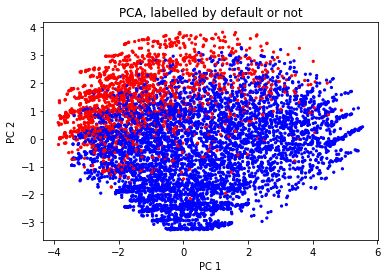

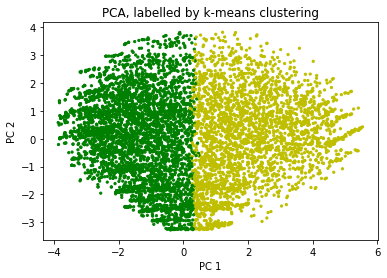

[0.2066147  0.11973502]


In [541]:
# scale the data
from sklearn.preprocessing import StandardScaler
x = df
x = StandardScaler().fit_transform(x)

# fitting with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)

# fitting with k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2).fit(x)

#visualisation
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
colors = np.where(df['Default'] == 1, 'r', 'b')
colors_kmeans = np.where(kmeans.labels_ == 1, 'y', 'g')
principalDf.plot.scatter('PC 1', 'PC 2', s = 5, c = colors)
plt.title("PCA, labelled by default or not")
principalDf.plot.scatter('PC 1', 'PC 2', s = 5, c = colors_kmeans)
plt.title("PCA, labelled by k-means clustering")
plt.show()
print(pca.explained_variance_ratio_)

Now, we can separate the sample according to our observations from studying the correlations and see if any clustering patterns can be observed.

Playing around with the identified variables show that separating by total charges, monthly charges, tenure, phone service, internet service and contract are the key factors such that clustering by considering the principal components of the variables we picked out earlier show a clear decision boundary. So we can modify the dataset to only consider these factors for training, and compare them with a baseline where we use all features.

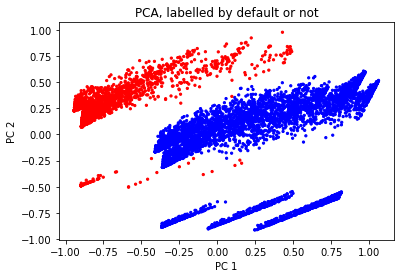

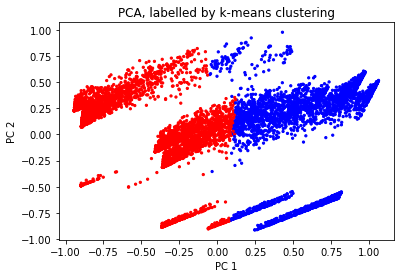

[0.39247972 0.22054582]


In [700]:
df_focused = df[["MonthlyCharges", "tenure", "TotalCharges", "PhoneService", "InternetService", "Contract", "Default"]]

# scale the data
from sklearn.preprocessing import StandardScaler
x = df_focused
x = MinMaxScaler().fit_transform(x)

# fitting with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)

# fitting with k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2).fit(x)

#visualisation
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
colors = np.where(df['Default'] == 1, 'r', 'b')
colors_kmeans = np.where(kmeans.labels_ == 1, 'r', 'b')
principalDf.plot.scatter('PC 1', 'PC 2', s = 5, c = colors)
plt.title("PCA, labelled by default or not")
principalDf.plot.scatter('PC 1', 'PC 2', s = 5, c = colors_kmeans)
plt.title("PCA, labelled by k-means clustering")
plt.show()
print(pca.explained_variance_ratio_)

# Data engineering
## Preprocessing the main dataset
Because categorical data is not ordinal, it necessitates the use of one-hot encoding to represent the training data. Here, we do just that.

In [579]:
df_encoded = pd.DataFrame()
for col in cat_columns:
    if col != "customerID" and col != 'Default':
        temp = pd.get_dummies(df[col], prefix = col)
        df_encoded = pd.concat([df_encoded, temp], axis = 1)
        
cts_columns = df.select_dtypes(['float64']).columns
for col in cts_columns:
    df_encoded = pd.concat([df_encoded, df[col]], axis = 1)

df_encoded

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,...,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,tenure,MonthlyCharges,TotalCharges
1,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,1,0,1.0,29.85,29.85
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,1,34.0,56.95,1889.50
3,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,2.0,53.85,108.15
4,0,1,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0,0,45.0,42.30,1840.75
5,1,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,0,1,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0,1,24.0,84.80,1990.50
7044,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,72.0,103.20,7362.90
7045,1,0,1,0,0,1,0,1,1,0,...,0,0,1,0,0,1,0,11.0,29.60,346.45
7046,0,1,0,1,0,1,1,0,0,1,...,0,0,1,0,0,0,1,4.0,74.40,306.60


In [799]:
Y = df["Default"]

# split data set into continuous and categorical, and encode/normalize
df_model_cat = pd.DataFrame()
df_model_cts = pd.DataFrame()

for col in cat_columns:
    if col != "customerID" and col != 'Default':
        temp = pd.get_dummies(df[col], prefix = col)
        df_model_cat = pd.concat([df_model_cat, temp], axis = 1)
        
cts_columns = df.select_dtypes(['float64']).columns
for col in cts_columns:
    df_model_cts = pd.concat([df_model_cts, df[col]], axis = 1)

X_cat = df_model_cat
X_cts = df_model_cts
Y = df["Default"]

# standardization of continous variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler
s = StandardScaler()
X_cts = s.fit_transform(X_cts)

# concatenate standardized continuous and categorical
X = np.concatenate([X_cat, X_cts], axis = 1)

# split
from sklearn.model_selection import train_test_split

test_size = 0.15
X_imbalanced_train, X_imbalanced_test, y_imbalanced_train, y_imbalanced_test = train_test_split(X, Y, test_size = test_size)

Additionally, because the dataset is imbalanced (almost twice as many non-defaulters), for simplicity we randomly sample non-defaulters and get a subsample so that the observations for both classes are balanced. We might also want to separate categorical from continuous variables, so I separate them here. I also perform standardization of the continuous data.

In [720]:
# balance the dataset
n_neg = (df[df["Default"] == 0])
n_pos = len((df[df["Default"] == 1]))
df_neg = df[df["Default"] == 0].sample(n_pos)
df_pos = df[df["Default"] == 1]
df_balanced = pd.concat([df_neg, df_pos])

# split data set into continuous and categorical, and encode/normalize
df_model_cat = pd.DataFrame()
df_model_cts = pd.DataFrame()

for col in cat_columns:
    if col != "customerID" and col != 'Default':
        temp = pd.get_dummies(df_balanced[col], prefix = col)
        df_model_cat = pd.concat([df_model_cat, temp], axis = 1)
        
cts_columns = df.select_dtypes(['float64']).columns
for col in cts_columns:
    df_model_cts = pd.concat([df_model_cts, df_balanced[col]], axis = 1)

X_cat = df_model_cat
X_cts = df_model_cts
Y = df_balanced["Default"]

# standardization of continous variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler
s = StandardScaler()
X_cts = s.fit_transform(X_cts)

# concatenate standardized continuous and categorical
X = np.concatenate([X_cat, X_cts], axis = 1)

Finally, we can split the data.

In [721]:
from sklearn.model_selection import train_test_split

test_size = 0.15
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size)

## Preprocessing the engineered dataset
We can follow the same steps, except that our starting dataframe only considers the variables we want.

In [736]:
# balance the dataset and focus on specific features
n_neg = (df[df["Default"] == 0])
n_pos = len((df[df["Default"] == 1]))
df_neg = df[df["Default"] == 0].sample(n_pos)
df_pos = df[df["Default"] == 1]
df_balanced = pd.concat([df_neg, df_pos])

# focus on specific columns
focused_columns = ["tenure", 
                   "MonthlyCharges", 
                   "TotalCharges", 
                   "InternetService", 
                   "PhoneService", 
                   "Contract", 
                   "Default"]
df_focused = df_balanced[focused_columns]


# split data set into continuous and categorical, and encode/normalize
df_model_cat = pd.DataFrame()
df_model_cts = pd.DataFrame()

for col in cat_columns:
    if col != "customerID" and col != 'Default' and col in focused_columns:
        temp = pd.get_dummies(df_focused[col], prefix = col)
        df_model_cat = pd.concat([df_model_cat, temp], axis = 1)
        
cts_columns = df.select_dtypes(['float64']).columns
for col in cts_columns:
    if col in focused_columns:
        df_model_cts = pd.concat([df_model_cts, df_focused[col]], axis = 1)

X_cat = df_model_cat
X_cts = df_model_cts
Y = df_balanced["Default"]

# standardization of continous variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler
s = StandardScaler()
X_cts = s.fit_transform(X_cts)

# concatenate standardized continuous and categorical
X = np.concatenate([X_cat, X_cts], axis = 1)

In [737]:
from sklearn.model_selection import train_test_split

test_size = 0.15
X_focused_train, X_focused_test, y_focused_train, y_focused_test = train_test_split(X, Y, test_size = test_size)

# XGBoost model
There is literature to suggest that gradient boosted tree methods often surpass deep learning techniques. We will explore tree-based methods as a baseline before exploring deep learning-based methods.

In [18]:
from xgboost import XGBClassifier

## Training and tuning for non-engineered dataset
We start by tuning the number of trees, since it effectively determines the number of 'epochs' that XGBoost trees go through. Our starting hyperparamaters are based on literature recommendations.
### Tuning number of trees
We carry out tuning using a basic grid search.

In [565]:
learning_rate = 0.05
n_estimators = 100
max_depth = 5
min_child_weight = 1
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
objective = 'binary:logistic'
scale_pos_weight = 1

model = XGBClassifier(use_label_encoder = False, 
                    learning_rate = learning_rate,
                    n_estimators = n_estimators,
                    max_depth = max_depth,
                    min_child_weight = min_child_weight,
                    gamma = gamma,
                    subsample = subsample,
                    colsample_bytree = colsample_bytree,
                    objective = objective,
                    scale_pos_weight = scale_pos_weight)

Best: -0.487030 using {'n_estimators': 70}
-0.489868 (0.025497) with: {'n_estimators': 50}
-0.487259 (0.026316) with: {'n_estimators': 60}
-0.487030 (0.027985) with: {'n_estimators': 70}
-0.487760 (0.027971) with: {'n_estimators': 80}
-0.488531 (0.028737) with: {'n_estimators': 90}
-0.489613 (0.029141) with: {'n_estimators': 100}
-0.490394 (0.029628) with: {'n_estimators': 110}
-0.491500 (0.030370) with: {'n_estimators': 120}
-0.492211 (0.031231) with: {'n_estimators': 130}
-0.492938 (0.031652) with: {'n_estimators': 140}


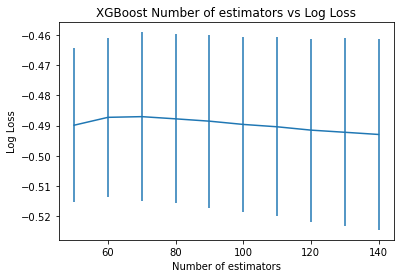

In [566]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

n_splits = 10
n_estimators = range(50, 150, 10)

# grid search
param_grid = dict(n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits = n_splits, shuffle=True)
grid_search = GridSearchCV(model, 
                           param_grid, 
                           scoring="neg_log_loss", 
                           n_jobs=1, 
                           cv=kfold)
grid_result = grid_search.fit(X_train, y_train, eval_metric = 'logloss')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost Number of estimators vs Log Loss")
plt.xlabel('Number of estimators')
plt.ylabel('Log Loss')
plt.show()


### Tuning maximum depth of trees
The optimal number from the grid search was 70 after a 10-fold cross-validation strategy. So we fix the number of trees to 70, and repeat. 

In [567]:
learning_rate = 0.05
n_estimators = 70
max_depth = 5
min_child_weight = 1
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
objective = 'binary:logistic'
scale_pos_weight = 1

model = XGBClassifier(use_label_encoder = False, 
                    learning_rate = learning_rate,
                    n_estimators = n_estimators,
                    max_depth = max_depth,
                    min_child_weight = min_child_weight,
                    gamma = gamma,
                    subsample = subsample,
                    colsample_bytree = colsample_bytree,
                    objective = objective,
                    scale_pos_weight = scale_pos_weight)

Best: -0.483767 using {'max_depth': 4}
-0.484407 (0.024084) with: {'max_depth': 3}
-0.483767 (0.024837) with: {'max_depth': 4}
-0.486428 (0.024952) with: {'max_depth': 5}
-0.489536 (0.024127) with: {'max_depth': 6}
-0.494548 (0.025695) with: {'max_depth': 7}


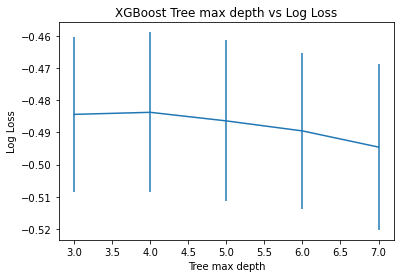

In [568]:
n_splits = 10
max_depth = range(3,8)

# grid search
param_grid = dict(max_depth = max_depth)
kfold = StratifiedKFold(n_splits = n_splits, shuffle=True)
grid_search = GridSearchCV(model, 
                           param_grid, 
                           scoring="neg_log_loss", 
                           n_jobs=1, 
                           cv=kfold)
grid_result = grid_search.fit(X_train, y_train, eval_metric = 'logloss')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost Tree max depth vs Log Loss")
plt.xlabel('Tree max depth')
plt.ylabel('Log Loss')
plt.show()


### Tuning minimum child weight
The optimal for the maximum depth of trees is 4. So we fix that, and move on again.

In [569]:
learning_rate = 0.05
n_estimators = 70
max_depth = 4
min_child_weight = 1
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
objective = 'binary:logistic'
scale_pos_weight = 1

model = XGBClassifier(use_label_encoder = False, 
                    learning_rate = learning_rate,
                    n_estimators = n_estimators,
                    max_depth = max_depth,
                    min_child_weight = min_child_weight,
                    gamma = gamma,
                    subsample = subsample,
                    colsample_bytree = colsample_bytree,
                    objective = objective,
                    scale_pos_weight = scale_pos_weight)

Best: -0.486156 using {'min_child_weight': 4}
-0.486175 (0.016672) with: {'min_child_weight': 1}
-0.486224 (0.016572) with: {'min_child_weight': 2}
-0.486490 (0.017672) with: {'min_child_weight': 3}
-0.486156 (0.017718) with: {'min_child_weight': 4}
-0.486608 (0.017682) with: {'min_child_weight': 5}


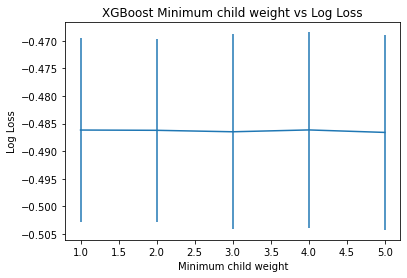

In [572]:
n_splits = 10
min_child_weight = range(1,6)

# grid search
param_grid = dict(min_child_weight = min_child_weight)
kfold = StratifiedKFold(n_splits = n_splits, shuffle=True)
grid_search = GridSearchCV(model, 
                           param_grid, 
                           scoring="neg_log_loss", 
                           n_jobs=1, 
                           cv=kfold)
grid_result = grid_search.fit(X_train, y_train, eval_metric = 'logloss')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot
plt.errorbar(min_child_weight, means, yerr=stds)
plt.title("XGBoost Minimum child weight vs Log Loss")
plt.xlabel('Minimum child weight')
plt.ylabel('Log Loss')
plt.show()


### Result
I can tune other hyperparamaters further, but as a baseline, this is probably sufficient.

I have chosen accuracy, AUC, precision and recall as my metrics of choice since they give me different perspectives on how a model is doing. Accuracy gives me the overall performance (which is okay, since we class-balanced the dataset). AUC, precision and recall tell me how the decision boundary is being set up - AUC tells me how the model splits a true and false data point, precision and recall tell me with respect to those who are identified as default, or will default in the sample, how many of them are correctly identified by the model. 

In [575]:
learning_rate = 0.05
n_estimators = 70
max_depth = 3
min_child_weight = 4
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
objective = 'binary:logistic'
scale_pos_weight = 1

model = XGBClassifier(use_label_encoder = False, 
                    learning_rate = learning_rate,
                    n_estimators = n_estimators,
                    max_depth = max_depth,
                    min_child_weight = min_child_weight,
                    gamma = gamma,
                    subsample = subsample,
                    colsample_bytree = colsample_bytree,
                    objective = objective,
                    scale_pos_weight = scale_pos_weight)

Here, we observe decent, if not ideal results here on the train and test sets using un-engineered data after tuning the tree. There is no significant overfitting.

[0]	validation_0-logloss:0.67710	validation_1-logloss:0.67740
[1]	validation_0-logloss:0.66225	validation_1-logloss:0.66292
[2]	validation_0-logloss:0.64955	validation_1-logloss:0.65024
[3]	validation_0-logloss:0.63638	validation_1-logloss:0.63756
[4]	validation_0-logloss:0.62429	validation_1-logloss:0.62557
[5]	validation_0-logloss:0.61378	validation_1-logloss:0.61583
[6]	validation_0-logloss:0.60374	validation_1-logloss:0.60584
[7]	validation_0-logloss:0.59544	validation_1-logloss:0.59845
[8]	validation_0-logloss:0.58722	validation_1-logloss:0.59040
[9]	validation_0-logloss:0.57938	validation_1-logloss:0.58294
[10]	validation_0-logloss:0.57225	validation_1-logloss:0.57591
[11]	validation_0-logloss:0.56534	validation_1-logloss:0.56944
[12]	validation_0-logloss:0.55906	validation_1-logloss:0.56329
[13]	validation_0-logloss:0.55338	validation_1-logloss:0.55712
[14]	validation_0-logloss:0.54809	validation_1-logloss:0.55255
[15]	validation_0-logloss:0.54326	validation_1-logloss:0.54802
[1

<AxesSubplot:>

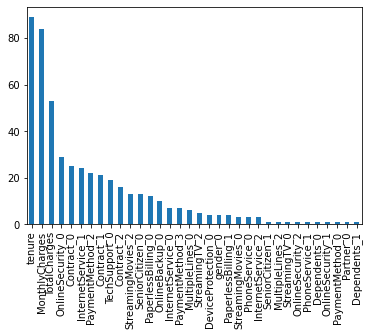

In [598]:
# fit
early_stopping_rounds = 15
model.fit(X_train, y_train,
          early_stopping_rounds = early_stopping_rounds,
          eval_set = [(X_train, y_train), (X_test, y_test)],
          eval_metric = ['logloss'], 
          verbose = True)

# predictions and evaluation
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f'test accuracy {accuracy_score(y_test, y_pred)}')
print(f'test AUC {roc_auc_score(y_test, y_pred)}')
print(f'test precision {precision_score(y_test, y_pred)}')
print(f'test recall {recall_score(y_test, y_pred)}')

print(f'train accuracy {accuracy_score(y_train, y_pred_train)}')
print(f'train AUC {roc_auc_score(y_train, y_pred_train)}')
print(f'train precision {precision_score(y_train, y_pred_train)}')
print(f'train recall {recall_score(y_train, y_pred_train)}')


pd.Series(model.get_booster().get_fscore()).sort_values(ascending = False).plot(kind = 'bar')

### Comparison to engineered data set
With just engineered features, we observe a slight improvement. 

In [ ]:
learning_rate = 0.05
n_estimators = 70
max_depth = 3
min_child_weight = 4
gamma = 0.1
subsample = 0.8
colsample_bytree = 0.8
objective = 'binary:logistic'
scale_pos_weight = 1

model = XGBClassifier(use_label_encoder = False, 
                    learning_rate = learning_rate,
                    n_estimators = n_estimators,
                    max_depth = max_depth,
                    min_child_weight = min_child_weight,
                    gamma = gamma,
                    subsample = subsample,
                    colsample_bytree = colsample_bytree,
                    objective = objective,
                    scale_pos_weight = scale_pos_weight)

[0]	validation_0-logloss:0.67888	validation_1-logloss:0.67656
[1]	validation_0-logloss:0.66707	validation_1-logloss:0.66270
[2]	validation_0-logloss:0.65476	validation_1-logloss:0.64822
[3]	validation_0-logloss:0.64425	validation_1-logloss:0.63563
[4]	validation_0-logloss:0.63409	validation_1-logloss:0.62325
[5]	validation_0-logloss:0.62483	validation_1-logloss:0.61211
[6]	validation_0-logloss:0.61639	validation_1-logloss:0.60205
[7]	validation_0-logloss:0.60868	validation_1-logloss:0.59304
[8]	validation_0-logloss:0.60105	validation_1-logloss:0.58351
[9]	validation_0-logloss:0.59387	validation_1-logloss:0.57456
[10]	validation_0-logloss:0.58786	validation_1-logloss:0.56718
[11]	validation_0-logloss:0.58226	validation_1-logloss:0.56030
[12]	validation_0-logloss:0.57706	validation_1-logloss:0.55381
[13]	validation_0-logloss:0.57195	validation_1-logloss:0.54709
[14]	validation_0-logloss:0.56716	validation_1-logloss:0.54108
[15]	validation_0-logloss:0.56350	validation_1-logloss:0.53634
[1

<AxesSubplot:>

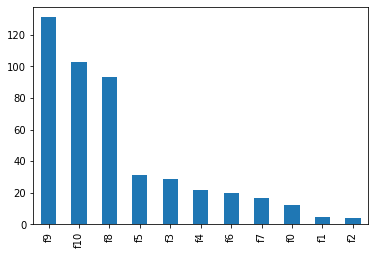

In [697]:
# fit
early_stopping_rounds = 15
model.fit(X_focused_train, y_focused_train,
          early_stopping_rounds = early_stopping_rounds,
          eval_set = [(X_focused_train, y_focused_train), (X_focused_test, y_focused_test)],
          eval_metric = ['logloss'], 
          verbose = True)

# predictions and evaluation
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
y_pred = model.predict(X_focused_test)
y_pred_train = model.predict(X_focused_train)
print(f'test accuracy {accuracy_score(y_focused_test, y_pred)}')
print(f'test AUC {roc_auc_score(y_focused_test, y_pred)}')
print(f'test precision {precision_score(y_focused_test, y_pred)}')
print(f'test recall {recall_score(y_focused_test, y_pred)}')

print(f'train accuracy {accuracy_score(y_focused_train, y_pred_train)}')
print(f'train AUC {roc_auc_score(y_focused_train, y_pred_train)}')
print(f'train precision {precision_score(y_focused_train, y_pred_train)}')
print(f'train recall {recall_score(y_focused_train, y_pred_train)}')


pd.Series(model.get_booster().get_fscore()).sort_values(ascending = False).plot(kind = 'bar')

## Training and tuning for engineered data
### Tuning number of trees

In [701]:
learning_rate = 0.05
n_estimators = 70
max_depth = 3
min_child_weight = 4
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
objective = 'binary:logistic'
scale_pos_weight = 1

model = XGBClassifier(use_label_encoder = False, 
                    learning_rate = learning_rate,
                    n_estimators = n_estimators,
                    max_depth = max_depth,
                    min_child_weight = min_child_weight,
                    gamma = gamma,
                    subsample = subsample,
                    colsample_bytree = colsample_bytree,
                    objective = objective,
                    scale_pos_weight = scale_pos_weight)

Best: -0.508719 using {'n_estimators': 110}
-0.516250 (0.020594) with: {'n_estimators': 50}
-0.512265 (0.022011) with: {'n_estimators': 60}
-0.510475 (0.023305) with: {'n_estimators': 70}
-0.509276 (0.023597) with: {'n_estimators': 80}
-0.508819 (0.024016) with: {'n_estimators': 90}
-0.508997 (0.024249) with: {'n_estimators': 100}
-0.508719 (0.024725) with: {'n_estimators': 110}
-0.509051 (0.025194) with: {'n_estimators': 120}
-0.509088 (0.025723) with: {'n_estimators': 130}
-0.509314 (0.026098) with: {'n_estimators': 140}


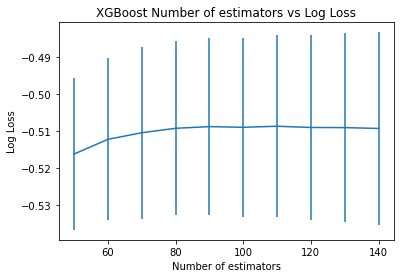

In [702]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

n_splits = 10
n_estimators = range(50, 150, 10)

# grid search
param_grid = dict(n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits = n_splits, shuffle=True)
grid_search = GridSearchCV(model, 
                           param_grid, 
                           scoring="neg_log_loss", 
                           n_jobs=1, 
                           cv=kfold)
grid_result = grid_search.fit(X_focused_train, y_focused_train, eval_metric = 'logloss')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost Number of estimators vs Log Loss")
plt.xlabel('Number of estimators')
plt.ylabel('Log Loss')
plt.show()


### Tuning maximum depth

In [705]:
learning_rate = 0.05
n_estimators = 110
max_depth = 3
min_child_weight = 4
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
objective = 'binary:logistic'
scale_pos_weight = 1

model = XGBClassifier(use_label_encoder = False, 
                    learning_rate = learning_rate,
                    n_estimators = n_estimators,
                    max_depth = max_depth,
                    min_child_weight = min_child_weight,
                    gamma = gamma,
                    subsample = subsample,
                    colsample_bytree = colsample_bytree,
                    objective = objective,
                    scale_pos_weight = scale_pos_weight)

Best: -0.508521 using {'max_depth': 3}
-0.509895 (0.019641) with: {'max_depth': 2}
-0.508521 (0.018099) with: {'max_depth': 3}
-0.510658 (0.017875) with: {'max_depth': 4}
-0.515419 (0.017422) with: {'max_depth': 5}
-0.519862 (0.017483) with: {'max_depth': 6}
-0.524508 (0.017836) with: {'max_depth': 7}


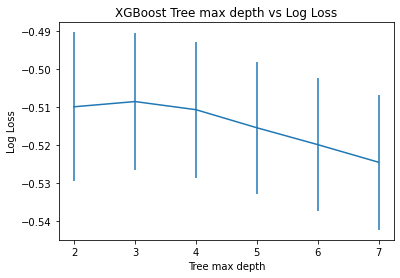

In [709]:
n_splits = 10
max_depth = range(2,8)

# grid search
param_grid = dict(max_depth = max_depth)
kfold = StratifiedKFold(n_splits = n_splits, shuffle=True)
grid_search = GridSearchCV(model, 
                           param_grid, 
                           scoring="neg_log_loss", 
                           n_jobs=1, 
                           cv=kfold)
grid_result = grid_search.fit(X_focused_train, y_focused_train, eval_metric = 'logloss')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost Tree max depth vs Log Loss")
plt.xlabel('Tree max depth')
plt.ylabel('Log Loss')
plt.show()


### Tuning minimum child weight

In [710]:
learning_rate = 0.05
n_estimators = 110
max_depth = 3
min_child_weight = 4
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
objective = 'binary:logistic'
scale_pos_weight = 1

model = XGBClassifier(use_label_encoder = False, 
                    learning_rate = learning_rate,
                    n_estimators = n_estimators,
                    max_depth = max_depth,
                    min_child_weight = min_child_weight,
                    gamma = gamma,
                    subsample = subsample,
                    colsample_bytree = colsample_bytree,
                    objective = objective,
                    scale_pos_weight = scale_pos_weight)

Best: -0.509529 using {'min_child_weight': 4}
-0.509724 (0.019283) with: {'min_child_weight': 1}
-0.509815 (0.019101) with: {'min_child_weight': 2}
-0.510196 (0.019219) with: {'min_child_weight': 3}
-0.509529 (0.018986) with: {'min_child_weight': 4}
-0.509550 (0.018755) with: {'min_child_weight': 5}


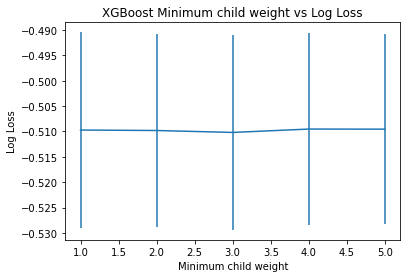

In [711]:
n_splits = 10
min_child_weight = range(1,6)

# grid search
param_grid = dict(min_child_weight = min_child_weight)
kfold = StratifiedKFold(n_splits = n_splits, shuffle=True)
grid_search = GridSearchCV(model, 
                           param_grid, 
                           scoring="neg_log_loss", 
                           n_jobs=1, 
                           cv=kfold)
grid_result = grid_search.fit(X_focused_train, y_focused_train, eval_metric = 'logloss')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot
plt.errorbar(min_child_weight, means, yerr=stds)
plt.title("XGBoost Minimum child weight vs Log Loss")
plt.xlabel('Minimum child weight')
plt.ylabel('Log Loss')
plt.show()


### Result
After tuning, there is no substantial difference.

In [738]:
learning_rate = 0.05
n_estimators = 110
max_depth = 3
min_child_weight = 4
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
objective = 'binary:logistic'
scale_pos_weight = 1

model = XGBClassifier(use_label_encoder = False, 
                    learning_rate = learning_rate,
                    n_estimators = n_estimators,
                    max_depth = max_depth,
                    min_child_weight = min_child_weight,
                    gamma = gamma,
                    subsample = subsample,
                    colsample_bytree = colsample_bytree,
                    objective = objective,
                    scale_pos_weight = scale_pos_weight)

[0]	validation_0-logloss:0.67888	validation_1-logloss:0.67656
[1]	validation_0-logloss:0.66707	validation_1-logloss:0.66270
[2]	validation_0-logloss:0.65476	validation_1-logloss:0.64822
[3]	validation_0-logloss:0.64425	validation_1-logloss:0.63563
[4]	validation_0-logloss:0.63409	validation_1-logloss:0.62325
[5]	validation_0-logloss:0.62483	validation_1-logloss:0.61211
[6]	validation_0-logloss:0.61639	validation_1-logloss:0.60205
[7]	validation_0-logloss:0.60868	validation_1-logloss:0.59304
[8]	validation_0-logloss:0.60105	validation_1-logloss:0.58351
[9]	validation_0-logloss:0.59387	validation_1-logloss:0.57456
[10]	validation_0-logloss:0.58786	validation_1-logloss:0.56715
[11]	validation_0-logloss:0.58226	validation_1-logloss:0.56027
[12]	validation_0-logloss:0.57706	validation_1-logloss:0.55378
[13]	validation_0-logloss:0.57195	validation_1-logloss:0.54706
[14]	validation_0-logloss:0.56716	validation_1-logloss:0.54105
[15]	validation_0-logloss:0.56350	validation_1-logloss:0.53631
[1

<AxesSubplot:>

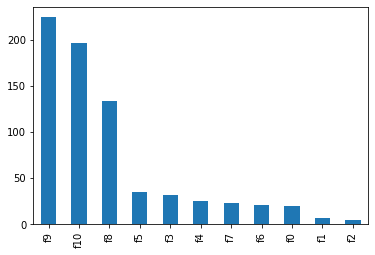

In [716]:
# fit
early_stopping_rounds = 15
model.fit(X_focused_train, y_focused_train,
          early_stopping_rounds = early_stopping_rounds,
          eval_set = [(X_focused_train, y_focused_train), (X_focused_test, y_focused_test)],
          eval_metric = ['logloss'], 
          verbose = True)

# predictions and evaluation
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
y_pred = model.predict(X_focused_test)
y_pred_train = model.predict(X_focused_train)
print(f'test accuracy {accuracy_score(y_focused_test, y_pred)}')
print(f'test AUC {roc_auc_score(y_focused_test, y_pred)}')
print(f'test precision {precision_score(y_focused_test, y_pred)}')
print(f'test recall {recall_score(y_focused_test, y_pred)}')

print(f'train accuracy {accuracy_score(y_focused_train, y_pred_train)}')
print(f'train AUC {roc_auc_score(y_focused_train, y_pred_train)}')
print(f'train precision {precision_score(y_focused_train, y_pred_train)}')
print(f'train recall {recall_score(y_focused_train, y_pred_train)}')


pd.Series(model.get_booster().get_fscore()).sort_values(ascending = False).plot(kind = 'bar')

# DNNs
We can now move on to deep networks. Literature suggests that ResNet-based and Transformer-based models outperform other deep network architectures (including TabNet!) for tabular data, and that ensemble methods tend to boost deep learning methods. I will implement two such models. 
## ResNet-based model

In [717]:
# models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Layer
import keras.backend as K


Here I define the ResNet-based model using Keras subclassing API. I choose this as it is easy to communicate the network design and the Keras API is good for prototyping custom network architectures. I base my network design on hyperparameters (number of layers, hidden layer dimensions, dropout rates) on literature.
### Layers

In [722]:
class BinaryClassifier(Layer):
    def __init__(self, activation = tf.nn.sigmoid):
        super(BinaryClassifier, self).__init__()
        self.activate = activation
        self.dense = layers.Dense(units = 1)
        self.bn = layers.BatchNormalization()
        
    def call(self, input_tensor):
        return self.activate(self.dense((self.bn(input_tensor))))
    
class ResNetBlock(Layer):
    def __init__(self, hiddenUnits = 16, resDropoutRate = 0.25, hiddenDropoutRate = 0.25, activation = tf.nn.relu):
        super(ResNetBlock, self).__init__()
        self.bn = layers.BatchNormalization()
        self.hiddenDrop = layers.Dropout(hiddenDropoutRate)
        self.dense1 = layers.Dense(units = hiddenUnits//2)
        self.dense2 = layers.Dense(units = hiddenUnits)
        self.resDrop = layers.Dropout(resDropoutRate)
        self.activate = activation
    
    def call(self, input_tensor):
        return input_tensor + self.resDrop((self.hiddenDrop(self.activate((self.bn(input_tensor))))))
        


### Models

In [723]:
class ResNet4(Model):
    def __init__(self, hiddenUnits, inp_shape):
        super(ResNet4, self).__init__()
        self.inp_shape = inp_shape
        self.dense = layers.Dense(units = hiddenUnits)
        self.res1 = ResNetBlock()
        self.res2 = ResNetBlock()
        self.res3 = ResNetBlock()
        self.res4 = ResNetBlock()
        self.final = BinaryClassifier()
        
    def call(self, input_tensor):
        x = self.dense(input_tensor)
        x = self.res4(self.res3(self.res2(self.res1(x))))
        return self.final(x)
    
    def model(self):
        x = keras.Input(shape = self.inp_shape)
        return Model(inputs = x, outputs = self.call(x))

    
class ResNet8(Model):
    def __init__(self, hiddenUnits, inp_shape):
        super(ResNet8, self).__init__()
        self.inp_shape = inp_shape
        self.dense = layers.Dense(units = hiddenUnits)
        self.res1 = ResNetBlock()
        self.res2 = ResNetBlock()
        self.res3 = ResNetBlock()
        self.res4 = ResNetBlock()
        self.res5 = ResNetBlock()
        self.res6 = ResNetBlock()
        self.res7 = ResNetBlock()
        self.res8 = ResNetBlock()
        self.final = BinaryClassifier()
        
    def call(self, input_tensor):
        x = self.dense(input_tensor)
        x = self.res4(self.res3(self.res2(self.res1(x))))
        x = self.res8(self.res7(self.res6(self.res5(x))))
        return self.final(x)
    
    def model(self):
        x = keras.Input(shape = self.inp_shape)
        return Model(inputs = x, outputs = self.call(x))

class ResNet12(Model):
    def __init__(self, hiddenUnits, inp_shape):
        super(ResNet12, self).__init__()
        self.inp_shape = inp_shape
        self.dense = layers.Dense(units = hiddenUnits)
        self.res1 = ResNetBlock()
        self.res2 = ResNetBlock()
        self.res3 = ResNetBlock()
        self.res4 = ResNetBlock()
        self.res5 = ResNetBlock()
        self.res6 = ResNetBlock()
        self.res7 = ResNetBlock()
        self.res8 = ResNetBlock()
        self.res9 = ResNetBlock()
        self.res10 = ResNetBlock()
        self.res11 = ResNetBlock()
        self.res12 = ResNetBlock()
        self.final = BinaryClassifier()
        
    def call(self, input_tensor):
        x = self.dense(input_tensor)
        x = self.res4(self.res3(self.res2(self.res1(x))))
        x = self.res8(self.res7(self.res6(self.res5(x))))
        x = self.res12(self.res11(self.res10(self.res9(x))))
        return self.final(x)
    
    def model(self):
        x = keras.Input(shape = self.inp_shape)
        return Model(inputs = x, outputs = self.call(x)) 


### Ensemble models

In [724]:
class ResNet8_ensemble5(Model):
    def __init__(self, hiddenUnits, inp_shape):
        super(ResNet8_ensemble5, self).__init__()
        self.inp_shape = inp_shape
        self.dense = layers.Dense(units = hiddenUnits)
        self.res1 = ResNet8(hiddenUnits, inp_shape)
        self.res2 = ResNet8(hiddenUnits, inp_shape)
        self.res3 = ResNet8(hiddenUnits, inp_shape)
        self.res4 = ResNet8(hiddenUnits, inp_shape)
        self.res5 = ResNet8(hiddenUnits, inp_shape)
        
        
    def call(self, input_tensor):
        x1 = self.res1(input_tensor)
        x2 = self.res2(input_tensor)
        x3 = self.res3(input_tensor)
        x4 = self.res4(input_tensor)
        x5 = self.res5(input_tensor)
        x = (x1 + x2 + x3 + x4 + x5)/5
        return x
    
    def model(self):
        x = keras.Input(shape = self.inp_shape)
        return Model(inputs = x, outputs = self.call(x))
    
class ResNet4_ensemble5(Model):
    def __init__(self, hiddenUnits, inp_shape):
        super(ResNet4_ensemble5, self).__init__()
        self.inp_shape = inp_shape
        self.res1 = ResNet4(hiddenUnits, inp_shape)
        self.res2 = ResNet4(hiddenUnits, inp_shape)
        self.res3 = ResNet4(hiddenUnits, inp_shape)
        self.res4 = ResNet4(hiddenUnits, inp_shape)
        self.res5 = ResNet4(hiddenUnits, inp_shape)
        
        
    def call(self, input_tensor):
        x1 = self.res1(input_tensor)
        x2 = self.res2(input_tensor)
        x3 = self.res3(input_tensor)
        x4 = self.res4(input_tensor)
        x5 = self.res5(input_tensor)
        x = (x1 + x2 + x3 + x4 + x5)/5
        return x
    
    def model(self):
        x = keras.Input(shape = self.inp_shape)
        return Model(inputs = x, outputs = self.call(x))


### Training and testing on main dataset

In [727]:
metrics = [tf.metrics.BinaryAccuracy(threshold = 0.5), 
           tf.keras.metrics.AUC(),
           tf.keras.metrics.Precision(),
           tf.keras.metrics.Recall()]

#### ResNet4 - ensemble

Model: "model_92"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_233 (InputLayer)          [(None, 46)]         0                                            
__________________________________________________________________________________________________
res_net4_50 (ResNet4)           (None, 1)            545         input_233[0][0]                  
__________________________________________________________________________________________________
res_net4_51 (ResNet4)           (None, 1)            545         input_233[0][0]                  
__________________________________________________________________________________________________
tf.__operators__.add_104 (TFOpL (None, 1)            0           res_net4_50[0][0]                
                                                                 res_net4_51[0][0]         

Epoch 19/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.5700 - binary_accuracy: 0.7222 - auc_78: 0.7841 - precision_60: 0.7120 - recall_60: 0.7302 - val_loss: 0.5649 - val_binary_accuracy: 0.7296 - val_auc_78: 0.8436 - val_precision_60: 0.6731 - val_recall_60: 0.9567
Epoch 20/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.5644 - binary_accuracy: 0.7200 - auc_78: 0.7878 - precision_60: 0.7067 - recall_60: 0.7355 - val_loss: 0.5611 - val_binary_accuracy: 0.7317 - val_auc_78: 0.8449 - val_precision_60: 0.6760 - val_recall_60: 0.9528
Epoch 21/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5611 - binary_accuracy: 0.7222 - auc_78: 0.7920 - precision_60: 0.7071 - recall_60: 0.7423 - val_loss: 0.5578 - val_binary_accuracy: 0.7379 - val_auc_78: 0.8466 - val_precision_60: 0.6817 - val_recall_60: 0.9528
Epoch 22/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.5569 - binary_accuracy: 0.7244 - auc_78: 0.7963 - precision_

2/2 [==============================] - 0s 25ms/step - loss: 0.5210 - binary_accuracy: 0.7400 - auc_78: 0.8201 - precision_60: 0.7276 - recall_60: 0.7528 - val_loss: 0.4932 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8575 - val_precision_60: 0.7288 - val_recall_60: 0.8780
Epoch 48/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5206 - binary_accuracy: 0.7452 - auc_78: 0.8211 - precision_60: 0.7324 - recall_60: 0.7589 - val_loss: 0.4916 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8576 - val_precision_60: 0.7288 - val_recall_60: 0.8780
Epoch 49/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.5125 - binary_accuracy: 0.7533 - auc_78: 0.8266 - precision_60: 0.7400 - recall_60: 0.7679 - val_loss: 0.4900 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8581 - val_precision_60: 0.7303 - val_recall_60: 0.8740
Epoch 50/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5239 - binary_accuracy: 0.7437 - auc_78: 0.8167 - precision_60: 0.7312 - r

2/2 [==============================] - 0s 24ms/step - loss: 0.5078 - binary_accuracy: 0.7537 - auc_78: 0.8302 - precision_60: 0.7388 - recall_60: 0.7717 - val_loss: 0.4678 - val_binary_accuracy: 0.7904 - val_auc_78: 0.8617 - val_precision_60: 0.7730 - val_recall_60: 0.8583
Epoch 76/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.5066 - binary_accuracy: 0.7485 - auc_78: 0.8298 - precision_60: 0.7334 - recall_60: 0.7671 - val_loss: 0.4675 - val_binary_accuracy: 0.7883 - val_auc_78: 0.8619 - val_precision_60: 0.7722 - val_recall_60: 0.8543
Epoch 77/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.5067 - binary_accuracy: 0.7515 - auc_78: 0.8309 - precision_60: 0.7370 - recall_60: 0.7687 - val_loss: 0.4670 - val_binary_accuracy: 0.7904 - val_auc_78: 0.8620 - val_precision_60: 0.7750 - val_recall_60: 0.8543
Epoch 78/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.5050 - binary_accuracy: 0.7556 - auc_78: 0.8321 - precision_60: 0.7415 - r

2/2 [==============================] - 0s 24ms/step - loss: 0.4990 - binary_accuracy: 0.7559 - auc_78: 0.8352 - precision_60: 0.7427 - recall_60: 0.7702 - val_loss: 0.4630 - val_binary_accuracy: 0.7904 - val_auc_78: 0.8624 - val_precision_60: 0.7895 - val_recall_60: 0.8268
Epoch 104/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.4930 - binary_accuracy: 0.7622 - auc_78: 0.8399 - precision_60: 0.7445 - recall_60: 0.7860 - val_loss: 0.4629 - val_binary_accuracy: 0.7904 - val_auc_78: 0.8625 - val_precision_60: 0.7895 - val_recall_60: 0.8268
Epoch 105/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4936 - binary_accuracy: 0.7596 - auc_78: 0.8375 - precision_60: 0.7449 - recall_60: 0.7769 - val_loss: 0.4629 - val_binary_accuracy: 0.7945 - val_auc_78: 0.8626 - val_precision_60: 0.7955 - val_recall_60: 0.8268
Epoch 106/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4934 - binary_accuracy: 0.7581 - auc_78: 0.8390 - precision_60: 0.7411 

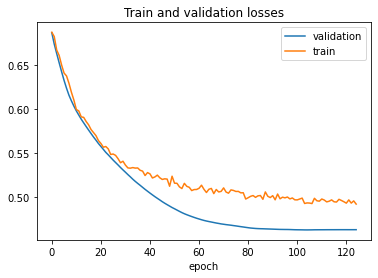

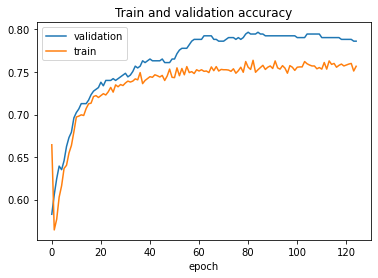

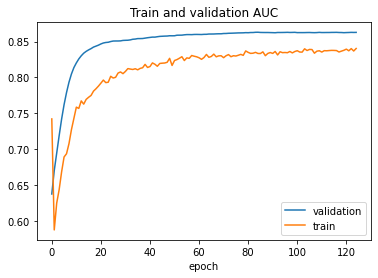

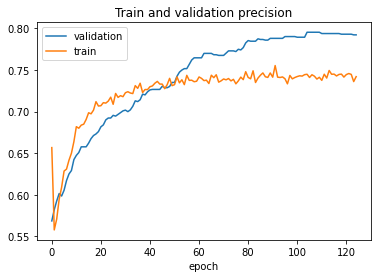

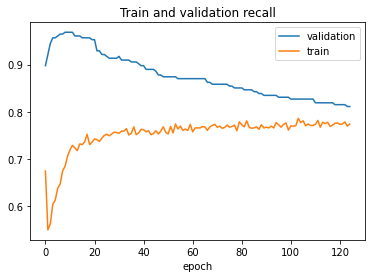

100/100 [==============================] - 0s 1ms/step - loss: 0.4842 - binary_accuracy: 0.7611 - auc_78: 0.8467 - precision_60: 0.7418 - recall_60: 0.7976


In [748]:
model = ResNet4_ensemble5(8, (46,))
model.model().summary()

# compile model
learning_rate = 1e-3

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = False),
              metrics = metrics
             )

# define training and validation parameters
batch_size = 2048
epochs = 1000
validation_split = 0.15
validation_data = None

# define callbacks
earlyStopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
decayLR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 5, verbose = 1)
callbacks = [decayLR, earlyStopping]

# ----- train and validate model -----
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    callbacks = callbacks,
                    validation_split = validation_split,
                    shuffle = True)

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation losses")
plt.plot(history.history["val_loss"], label = "validation")
plt.plot(history.history["loss"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation accuracy")
plt.plot(history.history["val_binary_accuracy"], label = "validation")
plt.plot(history.history["binary_accuracy"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation AUC")
plt.plot(history.history["val_auc_78"], label = "validation")
plt.plot(history.history["auc_78"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation precision")
plt.plot(history.history["val_precision_60"], label = "validation")
plt.plot(history.history["precision_60"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation recall")
plt.plot(history.history["val_recall_60"], label = "validation")
plt.plot(history.history["recall_60"], label = "train")
plt.legend()
plt.show()

# evaluation
results = model.evaluate(X_train, y_train)

#### ResNet8 - ensemble

Model: "model_99"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_241 (InputLayer)          [(None, 46)]         0                                            
__________________________________________________________________________________________________
res_net8_92 (ResNet8)           (None, 1)            1345        input_241[0][0]                  
__________________________________________________________________________________________________
res_net8_93 (ResNet8)           (None, 1)            1345        input_241[0][0]                  
__________________________________________________________________________________________________
tf.__operators__.add_116 (TFOpL (None, 1)            0           res_net8_92[0][0]                
                                                                 res_net8_93[0][0]         

Epoch 19/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.5587 - binary_accuracy: 0.7237 - auc_78: 0.7904 - precision_60: 0.6988 - recall_60: 0.7694 - val_loss: 0.4867 - val_binary_accuracy: 0.7883 - val_auc_78: 0.8452 - val_precision_60: 0.7931 - val_recall_60: 0.8150
Epoch 20/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.5547 - binary_accuracy: 0.7348 - auc_78: 0.7967 - precision_60: 0.7135 - recall_60: 0.7694 - val_loss: 0.4857 - val_binary_accuracy: 0.7904 - val_auc_78: 0.8471 - val_precision_60: 0.7917 - val_recall_60: 0.8228
Epoch 21/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.5511 - binary_accuracy: 0.7293 - auc_78: 0.7978 - precision_60: 0.7093 - recall_60: 0.7611 - val_loss: 0.4847 - val_binary_accuracy: 0.7904 - val_auc_78: 0.8488 - val_precision_60: 0.7895 - val_recall_60: 0.8268
Epoch 22/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.5522 - binary_accuracy: 0.7237 - auc_78: 0.7960 - precision_

2/2 [==============================] - 0s 50ms/step - loss: 0.5178 - binary_accuracy: 0.7478 - auc_78: 0.8220 - precision_60: 0.7317 - recall_60: 0.7687 - val_loss: 0.4715 - val_binary_accuracy: 0.7904 - val_auc_78: 0.8596 - val_precision_60: 0.7852 - val_recall_60: 0.8346
Epoch 48/1000
2/2 [==============================] - 0s 56ms/step - loss: 0.5188 - binary_accuracy: 0.7507 - auc_78: 0.8204 - precision_60: 0.7353 - recall_60: 0.7702 - val_loss: 0.4711 - val_binary_accuracy: 0.7925 - val_auc_78: 0.8600 - val_precision_60: 0.7881 - val_recall_60: 0.8346
Epoch 49/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.5144 - binary_accuracy: 0.7548 - auc_78: 0.8238 - precision_60: 0.7377 - recall_60: 0.7777 - val_loss: 0.4706 - val_binary_accuracy: 0.7925 - val_auc_78: 0.8599 - val_precision_60: 0.7881 - val_recall_60: 0.8346
Epoch 50/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.5140 - binary_accuracy: 0.7507 - auc_78: 0.8250 - precision_60: 0.7319 - r

2/2 [==============================] - 0s 54ms/step - loss: 0.5002 - binary_accuracy: 0.7604 - auc_78: 0.8343 - precision_60: 0.7432 - recall_60: 0.7830 - val_loss: 0.4652 - val_binary_accuracy: 0.7862 - val_auc_78: 0.8626 - val_precision_60: 0.7901 - val_recall_60: 0.8150
Epoch 76/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.5010 - binary_accuracy: 0.7615 - auc_78: 0.8345 - precision_60: 0.7469 - recall_60: 0.7784 - val_loss: 0.4651 - val_binary_accuracy: 0.7841 - val_auc_78: 0.8626 - val_precision_60: 0.7893 - val_recall_60: 0.8110
Epoch 77/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.5051 - binary_accuracy: 0.7511 - auc_78: 0.8308 - precision_60: 0.7358 - recall_60: 0.7702 - val_loss: 0.4651 - val_binary_accuracy: 0.7820 - val_auc_78: 0.8627 - val_precision_60: 0.7885 - val_recall_60: 0.8071
Epoch 78/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.5005 - binary_accuracy: 0.7493 - auc_78: 0.8334 - precision_60: 0.7289 - r

2/2 [==============================] - 0s 54ms/step - loss: 0.4974 - binary_accuracy: 0.7585 - auc_78: 0.8354 - precision_60: 0.7419 - recall_60: 0.7800 - val_loss: 0.4659 - val_binary_accuracy: 0.7799 - val_auc_78: 0.8626 - val_precision_60: 0.7899 - val_recall_60: 0.7992
Epoch 103/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.4975 - binary_accuracy: 0.7604 - auc_78: 0.8369 - precision_60: 0.7411 - recall_60: 0.7875 - val_loss: 0.4659 - val_binary_accuracy: 0.7799 - val_auc_78: 0.8626 - val_precision_60: 0.7899 - val_recall_60: 0.7992
Epoch 00103: early stopping


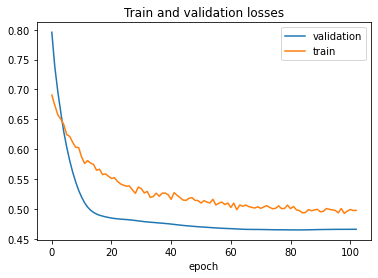

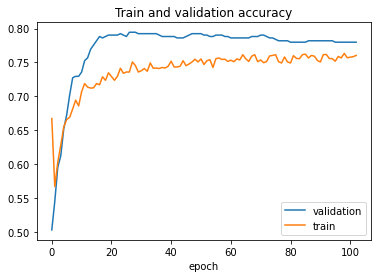

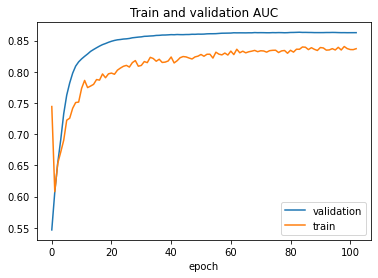

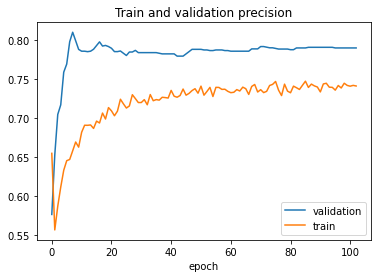

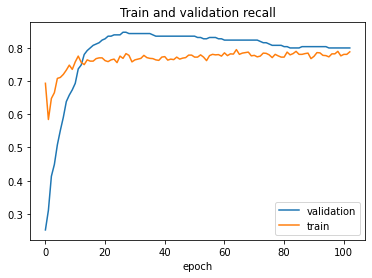

100/100 [==============================] - 0s 2ms/step - loss: 0.4831 - binary_accuracy: 0.7636 - auc_78: 0.8476 - precision_60: 0.7461 - recall_60: 0.7957


In [788]:
model = ResNet8_ensemble5(16, (46,))
model.model().summary()

# compile model
learning_rate = 1e-3

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = False),
              metrics = metrics
             )

# define training and validation parameters
batch_size = 2048
epochs = 1000
validation_split = 0.15
validation_data = None

# define callbacks
earlyStopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
decayLR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 5, verbose = 1)
callbacks = [decayLR, earlyStopping]

# ----- train and validate model -----
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    callbacks = callbacks,
                    validation_split = validation_split,
                    shuffle = True)

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation losses")
plt.plot(history.history["val_loss"], label = "validation")
plt.plot(history.history["loss"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation accuracy")
plt.plot(history.history["val_binary_accuracy"], label = "validation")
plt.plot(history.history["binary_accuracy"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation AUC")
plt.plot(history.history["val_auc_78"], label = "validation")
plt.plot(history.history["auc_78"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation precision")
plt.plot(history.history["val_precision_60"], label = "validation")
plt.plot(history.history["precision_60"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation recall")
plt.plot(history.history["val_recall_60"], label = "validation")
plt.plot(history.history["recall_60"], label = "train")
plt.legend()
plt.show()

# evaluation
results = model.evaluate(X_train, y_train)


### Training and testing with engineered data
#### ResNet4 - ensemble

Model: "model_85"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_226 (InputLayer)          [(None, 11)]         0                                            
__________________________________________________________________________________________________
res_net4_44 (ResNet4)           (None, 1)            265         input_226[0][0]                  
__________________________________________________________________________________________________
res_net4_45 (ResNet4)           (None, 1)            265         input_226[0][0]                  
__________________________________________________________________________________________________
tf.__operators__.add_80 (TFOpLa (None, 1)            0           res_net4_44[0][0]                
                                                                 res_net4_45[0][0]         

Epoch 19/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6226 - binary_accuracy: 0.6674 - auc_78: 0.7363 - precision_60: 0.6417 - recall_60: 0.7399 - val_loss: 0.6119 - val_binary_accuracy: 0.6667 - val_auc_78: 0.7577 - val_precision_60: 0.6932 - val_recall_60: 0.6797
Epoch 20/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6115 - binary_accuracy: 0.6911 - auc_78: 0.7596 - precision_60: 0.6628 - recall_60: 0.7631 - val_loss: 0.6071 - val_binary_accuracy: 0.6792 - val_auc_78: 0.7623 - val_precision_60: 0.7068 - val_recall_60: 0.6875
Epoch 21/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6155 - binary_accuracy: 0.6800 - auc_78: 0.7481 - precision_60: 0.6546 - recall_60: 0.7459 - val_loss: 0.6025 - val_binary_accuracy: 0.6876 - val_auc_78: 0.7668 - val_precision_60: 0.7149 - val_recall_60: 0.6953
Epoch 22/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6087 - binary_accuracy: 0.6774 - auc_78: 0.7573 - precision_

2/2 [==============================] - 0s 24ms/step - loss: 0.5586 - binary_accuracy: 0.7370 - auc_78: 0.8072 - precision_60: 0.7229 - recall_60: 0.7586 - val_loss: 0.5378 - val_binary_accuracy: 0.7442 - val_auc_78: 0.8168 - val_precision_60: 0.7428 - val_recall_60: 0.8008
Epoch 48/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.5557 - binary_accuracy: 0.7396 - auc_78: 0.8097 - precision_60: 0.7308 - recall_60: 0.7489 - val_loss: 0.5365 - val_binary_accuracy: 0.7505 - val_auc_78: 0.8173 - val_precision_60: 0.7509 - val_recall_60: 0.8008
Epoch 49/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.5566 - binary_accuracy: 0.7389 - auc_78: 0.8079 - precision_60: 0.7274 - recall_60: 0.7541 - val_loss: 0.5353 - val_binary_accuracy: 0.7505 - val_auc_78: 0.8181 - val_precision_60: 0.7509 - val_recall_60: 0.8008
Epoch 50/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5535 - binary_accuracy: 0.7419 - auc_78: 0.8109 - precision_60: 0.7320 - r

2/2 [==============================] - 0s 24ms/step - loss: 0.5257 - binary_accuracy: 0.7456 - auc_78: 0.8238 - precision_60: 0.7343 - recall_60: 0.7601 - val_loss: 0.5116 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8344 - val_precision_60: 0.7736 - val_recall_60: 0.8008
Epoch 76/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5311 - binary_accuracy: 0.7478 - auc_78: 0.8185 - precision_60: 0.7368 - recall_60: 0.7616 - val_loss: 0.5109 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8353 - val_precision_60: 0.7736 - val_recall_60: 0.8008
Epoch 77/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.5257 - binary_accuracy: 0.7515 - auc_78: 0.8233 - precision_60: 0.7397 - recall_60: 0.7669 - val_loss: 0.5102 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8355 - val_precision_60: 0.7736 - val_recall_60: 0.8008
Epoch 78/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5301 - binary_accuracy: 0.7504 - auc_78: 0.8194 - precision_60: 0.7384 - r

2/2 [==============================] - 0s 24ms/step - loss: 0.5097 - binary_accuracy: 0.7567 - auc_78: 0.8302 - precision_60: 0.7416 - recall_60: 0.7789 - val_loss: 0.4973 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8392 - val_precision_60: 0.7698 - val_recall_60: 0.7969
Epoch 104/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5107 - binary_accuracy: 0.7526 - auc_78: 0.8295 - precision_60: 0.7345 - recall_60: 0.7819 - val_loss: 0.4969 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8391 - val_precision_60: 0.7698 - val_recall_60: 0.7969
Epoch 105/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5049 - binary_accuracy: 0.7574 - auc_78: 0.8341 - precision_60: 0.7403 - recall_60: 0.7841 - val_loss: 0.4966 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8393 - val_precision_60: 0.7698 - val_recall_60: 0.7969
Epoch 106/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5066 - binary_accuracy: 0.7604 - auc_78: 0.8326 - precision_60: 0.7448 

2/2 [==============================] - 0s 24ms/step - loss: 0.5071 - binary_accuracy: 0.7563 - auc_78: 0.8292 - precision_60: 0.7394 - recall_60: 0.7826 - val_loss: 0.4906 - val_binary_accuracy: 0.7715 - val_auc_78: 0.8408 - val_precision_60: 0.7882 - val_recall_60: 0.7852
Epoch 132/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5012 - binary_accuracy: 0.7563 - auc_78: 0.8349 - precision_60: 0.7421 - recall_60: 0.7766 - val_loss: 0.4904 - val_binary_accuracy: 0.7715 - val_auc_78: 0.8410 - val_precision_60: 0.7882 - val_recall_60: 0.7852
Epoch 133/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5015 - binary_accuracy: 0.7556 - auc_78: 0.8336 - precision_60: 0.7411 - recall_60: 0.7766 - val_loss: 0.4902 - val_binary_accuracy: 0.7715 - val_auc_78: 0.8409 - val_precision_60: 0.7882 - val_recall_60: 0.7852
Epoch 134/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5040 - binary_accuracy: 0.7574 - auc_78: 0.8311 - precision_60: 0.7430 

2/2 [==============================] - 0s 24ms/step - loss: 0.4982 - binary_accuracy: 0.7574 - auc_78: 0.8349 - precision_60: 0.7396 - recall_60: 0.7856 - val_loss: 0.4867 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8423 - val_precision_60: 0.7866 - val_recall_60: 0.7773
Epoch 160/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5006 - binary_accuracy: 0.7574 - auc_78: 0.8339 - precision_60: 0.7403 - recall_60: 0.7841 - val_loss: 0.4866 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8424 - val_precision_60: 0.7866 - val_recall_60: 0.7773
Epoch 161/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.5014 - binary_accuracy: 0.7530 - auc_78: 0.8327 - precision_60: 0.7340 - recall_60: 0.7841 - val_loss: 0.4865 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8426 - val_precision_60: 0.7866 - val_recall_60: 0.7773
Epoch 162/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4978 - binary_accuracy: 0.7615 - auc_78: 0.8357 - precision_60: 0.7416 

2/2 [==============================] - 0s 23ms/step - loss: 0.4951 - binary_accuracy: 0.7593 - auc_78: 0.8374 - precision_60: 0.7419 - recall_60: 0.7864 - val_loss: 0.4841 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8435 - val_precision_60: 0.7888 - val_recall_60: 0.7734
Epoch 188/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4948 - binary_accuracy: 0.7633 - auc_78: 0.8383 - precision_60: 0.7439 - recall_60: 0.7946 - val_loss: 0.4840 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8437 - val_precision_60: 0.7888 - val_recall_60: 0.7734
Epoch 189/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.4996 - binary_accuracy: 0.7607 - auc_78: 0.8337 - precision_60: 0.7406 - recall_60: 0.7939 - val_loss: 0.4839 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8438 - val_precision_60: 0.7888 - val_recall_60: 0.7734
Epoch 190/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4982 - binary_accuracy: 0.7581 - auc_78: 0.8347 - precision_60: 0.7396 

Epoch 215/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4937 - binary_accuracy: 0.7615 - auc_78: 0.8391 - precision_60: 0.7426 - recall_60: 0.7916 - val_loss: 0.4830 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8446 - val_precision_60: 0.7888 - val_recall_60: 0.7734
Epoch 216/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.4953 - binary_accuracy: 0.7559 - auc_78: 0.8369 - precision_60: 0.7349 - recall_60: 0.7916 - val_loss: 0.4830 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8445 - val_precision_60: 0.7888 - val_recall_60: 0.7734
Epoch 217/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5008 - binary_accuracy: 0.7589 - auc_78: 0.8320 - precision_60: 0.7383 - recall_60: 0.7931 - val_loss: 0.4829 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8445 - val_precision_60: 0.7888 - val_recall_60: 0.7734
Epoch 218/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.4982 - binary_accuracy: 0.7630 - auc_78: 0.8353 - precis

2/2 [==============================] - 0s 25ms/step - loss: 0.4930 - binary_accuracy: 0.7600 - auc_78: 0.8382 - precision_60: 0.7412 - recall_60: 0.7901 - val_loss: 0.4819 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8443 - val_precision_60: 0.7821 - val_recall_60: 0.7852
Epoch 244/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4918 - binary_accuracy: 0.7604 - auc_78: 0.8391 - precision_60: 0.7404 - recall_60: 0.7931 - val_loss: 0.4819 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8443 - val_precision_60: 0.7821 - val_recall_60: 0.7852
Epoch 245/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.4945 - binary_accuracy: 0.7574 - auc_78: 0.8371 - precision_60: 0.7366 - recall_60: 0.7924 - val_loss: 0.4818 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8444 - val_precision_60: 0.7821 - val_recall_60: 0.7852
Epoch 246/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4954 - binary_accuracy: 0.7593 - auc_78: 0.8368 - precision_60: 0.7382 

Epoch 271/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.4939 - binary_accuracy: 0.7589 - auc_78: 0.8382 - precision_60: 0.7390 - recall_60: 0.7916 - val_loss: 0.4812 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8443 - val_precision_60: 0.7821 - val_recall_60: 0.7852
Epoch 272/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.4942 - binary_accuracy: 0.7585 - auc_78: 0.8386 - precision_60: 0.7365 - recall_60: 0.7961 - val_loss: 0.4812 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8445 - val_precision_60: 0.7821 - val_recall_60: 0.7852
Epoch 273/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4943 - binary_accuracy: 0.7600 - auc_78: 0.8379 - precision_60: 0.7389 - recall_60: 0.7954 - val_loss: 0.4811 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8446 - val_precision_60: 0.7821 - val_recall_60: 0.7852
Epoch 274/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4928 - binary_accuracy: 0.7604 - auc_78: 0.8395 - precis

2/2 [==============================] - 0s 23ms/step - loss: 0.4943 - binary_accuracy: 0.7607 - auc_78: 0.8384 - precision_60: 0.7406 - recall_60: 0.7939 - val_loss: 0.4807 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8448 - val_precision_60: 0.7791 - val_recall_60: 0.7852
Epoch 299/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4925 - binary_accuracy: 0.7633 - auc_78: 0.8397 - precision_60: 0.7445 - recall_60: 0.7931 - val_loss: 0.4807 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8447 - val_precision_60: 0.7791 - val_recall_60: 0.7852
Epoch 300/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.4983 - binary_accuracy: 0.7548 - auc_78: 0.8336 - precision_60: 0.7340 - recall_60: 0.7901 - val_loss: 0.4807 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8447 - val_precision_60: 0.7791 - val_recall_60: 0.7852

Epoch 00300: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
Epoch 301/1000
2/2 [==============================] - 0s 23ms/step 

2/2 [==============================] - 0s 24ms/step - loss: 0.4969 - binary_accuracy: 0.7611 - auc_78: 0.8354 - precision_60: 0.7407 - recall_60: 0.7946 - val_loss: 0.4804 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8447 - val_precision_60: 0.7799 - val_recall_60: 0.7891
Epoch 326/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4924 - binary_accuracy: 0.7604 - auc_78: 0.8391 - precision_60: 0.7397 - recall_60: 0.7946 - val_loss: 0.4804 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8449 - val_precision_60: 0.7799 - val_recall_60: 0.7891
Epoch 327/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.4968 - binary_accuracy: 0.7596 - auc_78: 0.8354 - precision_60: 0.7407 - recall_60: 0.7901 - val_loss: 0.4804 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8448 - val_precision_60: 0.7799 - val_recall_60: 0.7891
Epoch 328/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4988 - binary_accuracy: 0.7585 - auc_78: 0.8344 - precision_60: 0.7385 

Epoch 352/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4954 - binary_accuracy: 0.7626 - auc_78: 0.8367 - precision_60: 0.7432 - recall_60: 0.7939 - val_loss: 0.4803 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8447 - val_precision_60: 0.7799 - val_recall_60: 0.7891

Epoch 00352: ReduceLROnPlateau reducing learning rate to 3.051757957450718e-08.
Epoch 353/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4932 - binary_accuracy: 0.7619 - auc_78: 0.8387 - precision_60: 0.7435 - recall_60: 0.7909 - val_loss: 0.4803 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8448 - val_precision_60: 0.7799 - val_recall_60: 0.7891
Epoch 354/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4944 - binary_accuracy: 0.7600 - auc_78: 0.8380 - precision_60: 0.7402 - recall_60: 0.7924 - val_loss: 0.4803 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8448 - val_precision_60: 0.7799 - val_recall_60: 0.7891
Epoch 355/1000
2/2 [==============================] 

Epoch 379/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4962 - binary_accuracy: 0.7596 - auc_78: 0.8363 - precision_60: 0.7400 - recall_60: 0.7916 - val_loss: 0.4802 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8447 - val_precision_60: 0.7769 - val_recall_60: 0.7891

Epoch 00379: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Epoch 380/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4945 - binary_accuracy: 0.7611 - auc_78: 0.8383 - precision_60: 0.7401 - recall_60: 0.7961 - val_loss: 0.4802 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8447 - val_precision_60: 0.7769 - val_recall_60: 0.7891
Epoch 381/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4927 - binary_accuracy: 0.7552 - auc_78: 0.8392 - precision_60: 0.7355 - recall_60: 0.7879 - val_loss: 0.4802 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8447 - val_precision_60: 0.7769 - val_recall_60: 0.7891
Epoch 382/1000
2/2 [==============================] 

Epoch 406/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4917 - binary_accuracy: 0.7619 - auc_78: 0.8402 - precision_60: 0.7421 - recall_60: 0.7939 - val_loss: 0.4802 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8447 - val_precision_60: 0.7769 - val_recall_60: 0.7891
Epoch 407/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4952 - binary_accuracy: 0.7663 - auc_78: 0.8372 - precision_60: 0.7453 - recall_60: 0.8006 - val_loss: 0.4802 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8448 - val_precision_60: 0.7769 - val_recall_60: 0.7891
Epoch 408/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4971 - binary_accuracy: 0.7637 - auc_78: 0.8363 - precision_60: 0.7451 - recall_60: 0.7931 - val_loss: 0.4802 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8448 - val_precision_60: 0.7769 - val_recall_60: 0.7891
Epoch 409/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4927 - binary_accuracy: 0.7585 - auc_78: 0.8386 - precis

2/2 [==============================] - 0s 24ms/step - loss: 0.4929 - binary_accuracy: 0.7622 - auc_78: 0.8391 - precision_60: 0.7430 - recall_60: 0.7931 - val_loss: 0.4801 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8447 - val_precision_60: 0.7769 - val_recall_60: 0.7891
Epoch 434/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4918 - binary_accuracy: 0.7604 - auc_78: 0.8392 - precision_60: 0.7407 - recall_60: 0.7924 - val_loss: 0.4801 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8446 - val_precision_60: 0.7769 - val_recall_60: 0.7891

Epoch 00434: ReduceLROnPlateau reducing learning rate to 9.313226188509272e-13.
Epoch 435/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4950 - binary_accuracy: 0.7626 - auc_78: 0.8374 - precision_60: 0.7435 - recall_60: 0.7931 - val_loss: 0.4801 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8448 - val_precision_60: 0.7769 - val_recall_60: 0.7891
Epoch 436/1000
2/2 [==============================] - 0s 23ms/step 

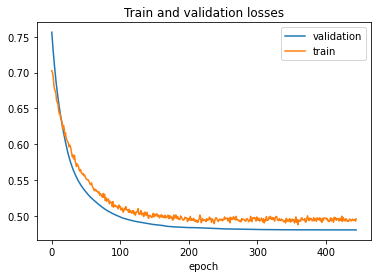

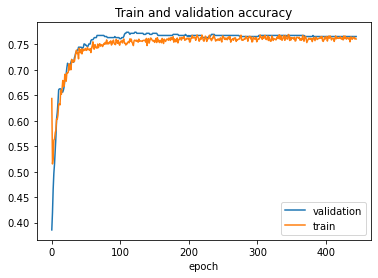

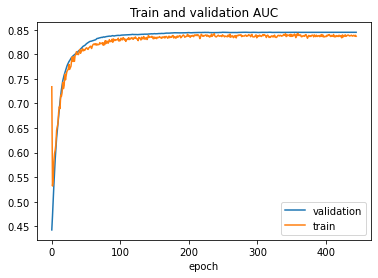

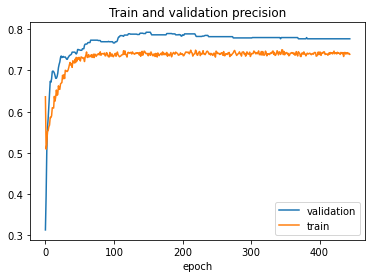

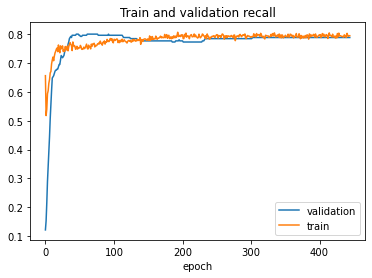

100/100 [==============================] - 0s 1ms/step - loss: 0.4866 - binary_accuracy: 0.7636 - auc_78: 0.8438 - precision_60: 0.7526 - recall_60: 0.7862


In [740]:
model = ResNet4_ensemble5(8, (11,))
model.model().summary()

# compile model
learning_rate = 1e-3

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = False),
              metrics = metrics
             )

# define training and validation parameters
batch_size = 2048
epochs = 1000
validation_split = 0.15
validation_data = None

# define callbacks
earlyStopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
decayLR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 5, verbose = 1)
callbacks = [decayLR, earlyStopping]

# ----- train and validate model -----
history = model.fit(X_focused_train, y_focused_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    callbacks = callbacks,
                    validation_split = validation_split,
                    shuffle = True)

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation losses")
plt.plot(history.history["val_loss"], label = "validation")
plt.plot(history.history["loss"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation accuracy")
plt.plot(history.history["val_binary_accuracy"], label = "validation")
plt.plot(history.history["binary_accuracy"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation AUC")
plt.plot(history.history["val_auc_78"], label = "validation")
plt.plot(history.history["auc_78"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation precision")
plt.plot(history.history["val_precision_60"], label = "validation")
plt.plot(history.history["precision_60"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation recall")
plt.plot(history.history["val_recall_60"], label = "validation")
plt.plot(history.history["recall_60"], label = "train")
plt.legend()
plt.show()

# evaluation
results = model.evaluate(X_focused_train, y_focused_train)

#### ResNet8 - ensemble

Model: "model_90"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_231 (InputLayer)          [(None, 11)]         0                                            
__________________________________________________________________________________________________
res_net8_77 (ResNet8)           (None, 1)            785         input_231[0][0]                  
__________________________________________________________________________________________________
res_net8_78 (ResNet8)           (None, 1)            785         input_231[0][0]                  
__________________________________________________________________________________________________
tf.__operators__.add_100 (TFOpL (None, 1)            0           res_net8_77[0][0]                
                                                                 res_net8_78[0][0]         

Epoch 19/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.5825 - binary_accuracy: 0.7130 - auc_78: 0.7772 - precision_60: 0.7024 - recall_60: 0.7271 - val_loss: 0.5465 - val_binary_accuracy: 0.7421 - val_auc_78: 0.8250 - val_precision_60: 0.7224 - val_recall_60: 0.8438
Epoch 20/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.5773 - binary_accuracy: 0.7222 - auc_78: 0.7853 - precision_60: 0.7119 - recall_60: 0.7354 - val_loss: 0.5441 - val_binary_accuracy: 0.7442 - val_auc_78: 0.8266 - val_precision_60: 0.7233 - val_recall_60: 0.8477
Epoch 21/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.5779 - binary_accuracy: 0.7285 - auc_78: 0.7848 - precision_60: 0.7179 - recall_60: 0.7421 - val_loss: 0.5423 - val_binary_accuracy: 0.7463 - val_auc_78: 0.8274 - val_precision_60: 0.7243 - val_recall_60: 0.8516
Epoch 22/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.5743 - binary_accuracy: 0.7226 - auc_78: 0.7865 - precision_

2/2 [==============================] - 0s 36ms/step - loss: 0.5214 - binary_accuracy: 0.7433 - auc_78: 0.8237 - precision_60: 0.7311 - recall_60: 0.7601 - val_loss: 0.4991 - val_binary_accuracy: 0.7547 - val_auc_78: 0.8427 - val_precision_60: 0.7565 - val_recall_60: 0.8008
Epoch 48/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.5248 - binary_accuracy: 0.7459 - auc_78: 0.8221 - precision_60: 0.7334 - recall_60: 0.7631 - val_loss: 0.4983 - val_binary_accuracy: 0.7547 - val_auc_78: 0.8427 - val_precision_60: 0.7565 - val_recall_60: 0.8008
Epoch 49/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.5214 - binary_accuracy: 0.7511 - auc_78: 0.8243 - precision_60: 0.7354 - recall_60: 0.7751 - val_loss: 0.4975 - val_binary_accuracy: 0.7526 - val_auc_78: 0.8426 - val_precision_60: 0.7537 - val_recall_60: 0.8008
Epoch 50/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.5246 - binary_accuracy: 0.7456 - auc_78: 0.8205 - precision_60: 0.7296 - r

2/2 [==============================] - 0s 37ms/step - loss: 0.5058 - binary_accuracy: 0.7522 - auc_78: 0.8317 - precision_60: 0.7360 - recall_60: 0.7774 - val_loss: 0.4847 - val_binary_accuracy: 0.7526 - val_auc_78: 0.8447 - val_precision_60: 0.7500 - val_recall_60: 0.8086
Epoch 76/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.5059 - binary_accuracy: 0.7567 - auc_78: 0.8311 - precision_60: 0.7365 - recall_60: 0.7901 - val_loss: 0.4845 - val_binary_accuracy: 0.7526 - val_auc_78: 0.8446 - val_precision_60: 0.7500 - val_recall_60: 0.8086
Epoch 77/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.5086 - binary_accuracy: 0.7519 - auc_78: 0.8299 - precision_60: 0.7325 - recall_60: 0.7841 - val_loss: 0.4842 - val_binary_accuracy: 0.7526 - val_auc_78: 0.8446 - val_precision_60: 0.7500 - val_recall_60: 0.8086
Epoch 78/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.5077 - binary_accuracy: 0.7585 - auc_78: 0.8302 - precision_60: 0.7348 - r

2/2 [==============================] - 0s 36ms/step - loss: 0.5026 - binary_accuracy: 0.7567 - auc_78: 0.8318 - precision_60: 0.7346 - recall_60: 0.7946 - val_loss: 0.4805 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8457 - val_precision_60: 0.7630 - val_recall_60: 0.8047
Epoch 104/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.4993 - binary_accuracy: 0.7637 - auc_78: 0.8343 - precision_60: 0.7430 - recall_60: 0.7976 - val_loss: 0.4805 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8459 - val_precision_60: 0.7630 - val_recall_60: 0.8047
Epoch 105/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.4997 - binary_accuracy: 0.7622 - auc_78: 0.8352 - precision_60: 0.7396 - recall_60: 0.8006 - val_loss: 0.4805 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8459 - val_precision_60: 0.7630 - val_recall_60: 0.8047
Epoch 106/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.4958 - binary_accuracy: 0.7607 - auc_78: 0.8370 - precision_60: 0.7350 

2/2 [==============================] - 0s 37ms/step - loss: 0.4988 - binary_accuracy: 0.7593 - auc_78: 0.8338 - precision_60: 0.7352 - recall_60: 0.8013 - val_loss: 0.4805 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8468 - val_precision_60: 0.7678 - val_recall_60: 0.8008

Epoch 00130: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 131/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.5000 - binary_accuracy: 0.7544 - auc_78: 0.8337 - precision_60: 0.7309 - recall_60: 0.7961 - val_loss: 0.4804 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8469 - val_precision_60: 0.7678 - val_recall_60: 0.8008
Epoch 132/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.4990 - binary_accuracy: 0.7544 - auc_78: 0.8348 - precision_60: 0.7319 - recall_60: 0.7939 - val_loss: 0.4805 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8471 - val_precision_60: 0.7678 - val_recall_60: 0.8008
Epoch 133/1000
2/2 [==============================] - 0s 37ms/step 

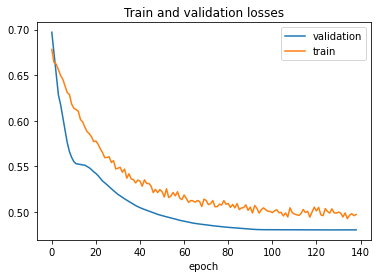

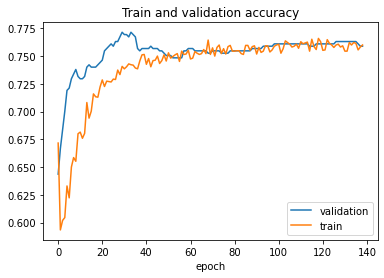

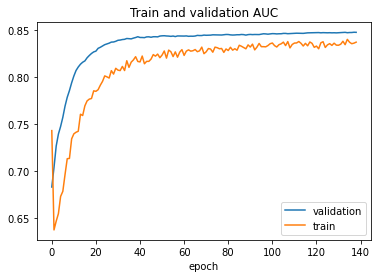

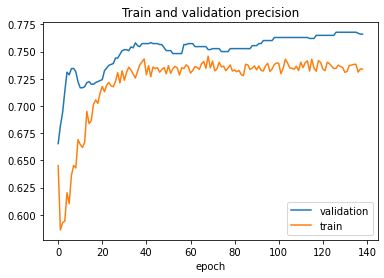

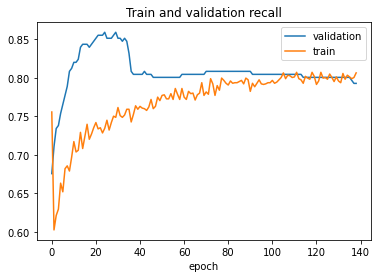

100/100 [==============================] - 0s 2ms/step - loss: 0.4866 - binary_accuracy: 0.7586 - auc_78: 0.8437 - precision_60: 0.7422 - recall_60: 0.7931


In [745]:
model = ResNet8_ensemble5(4, (11,))
model.model().summary()

# compile model
learning_rate = 1e-3

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = False),
              metrics = metrics
             )

# define training and validation parameters
batch_size = 2048
epochs = 1000
validation_split = 0.15
validation_data = None

# define callbacks
earlyStopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
decayLR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 5, verbose = 1)
callbacks = [decayLR, earlyStopping]

# ----- train and validate model -----
history = model.fit(X_focused_train, y_focused_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    callbacks = callbacks,
                    validation_split = validation_split,
                    shuffle = True)

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation losses")
plt.plot(history.history["val_loss"], label = "validation")
plt.plot(history.history["loss"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation accuracy")
plt.plot(history.history["val_binary_accuracy"], label = "validation")
plt.plot(history.history["binary_accuracy"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation AUC")
plt.plot(history.history["val_auc_78"], label = "validation")
plt.plot(history.history["auc_78"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation precision")
plt.plot(history.history["val_precision_60"], label = "validation")
plt.plot(history.history["precision_60"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation recall")
plt.plot(history.history["val_recall_60"], label = "validation")
plt.plot(history.history["recall_60"], label = "train")
plt.legend()
plt.show()

# evaluation
results = model.evaluate(X_focused_train, y_focused_train)

## Feature tokenizer - Transformer network
### Layers

In [789]:
class FeatureTokenizer(Layer):
    def __init__(self, numVar, d = 16):
        super(FeatureTokenizer, self).__init__()
        self.dense = layers.Dense(units = numVar * d)
        self.numVar = numVar
        self.d = d
        self.reshape = layers.Reshape((numVar, d))
        
    def call(self, input_tensor):
        return self.reshape(self.dense(input_tensor))

class TransformerBlock(Layer):
    def __init__(self, num_heads = 10, keyValueDim = 16, mlpDropout = 0.1, atDropout = 0.2):
        super(TransformerBlock, self).__init__()
        
        # pre-norm and attention
        self.bn1 = layers.BatchNormalization()
        self.attention = layers.MultiHeadAttention(num_heads = num_heads,
                                                   key_dim = keyValueDim,
                                                   value_dim = keyValueDim,
                                                   dropout = atDropout)
        
        # pre-norm and MLP
        self.bn2 = layers.BatchNormalization()
        self.dense = layers.Dense(units = keyValueDim, activation = tf.nn.relu)
        self.drop = tf.keras.layers.Dropout(rate = mlpDropout)
        
        
    def call(self, input_tensor):  
        x = self.attention(self.bn1(input_tensor), self.bn1(input_tensor))
        x_inter = x + input_tensor
        x = self.drop(self.dense((self.bn2(x_inter))))
        return x + x_inter


### Models
Combine by maximum (like max pooling, but just max)

In [781]:
class FT_Transformer3(Model):
    def __init__(self, numVar, d, num_heads, inp_shape):
        super(FT_Transformer3, self).__init__()
        self.ft = FeatureTokenizer(numVar = numVar, d = d)
        self.t1 = TransformerBlock(num_heads = num_heads, keyValueDim = d)
        self.t2 = TransformerBlock(num_heads = num_heads, keyValueDim = d)
        self.t3 = TransformerBlock(num_heads = num_heads, keyValueDim = d)
        self.max = layers.Maximum()
        self.final = BinaryClassifier()
        self.inp_shape = inp_shape
        
    def call(self, input_tensor):
        x = self.ft(input_tensor)
        x = self.t3(self.t2(self.t1(x)))
        x = tf.math.reduce_max(x, axis = 1)
        return self.final(x)
        
    def model(self):
        x = keras.Input(shape = self.inp_shape)
        return Model(inputs = x, outputs = self.call(x))

In [796]:
class FT_Transformer4(Model):
    def __init__(self, numVar, d, num_heads, inp_shape):
        super(FT_Transformer4, self).__init__()
        self.ft = FeatureTokenizer(numVar = numVar, d = d)
        self.t1 = TransformerBlock(num_heads = num_heads, keyValueDim = d)
        self.t2 = TransformerBlock(num_heads = num_heads, keyValueDim = d)
        self.t3 = TransformerBlock(num_heads = num_heads, keyValueDim = d)
        self.t4 = TransformerBlock(num_heads = num_heads, keyValueDim = d)
        self.max = layers.Maximum()
        self.final = BinaryClassifier()
        self.inp_shape = inp_shape
        
    def call(self, input_tensor):
        x = self.ft(input_tensor)
        x = self.t4(self.t3(self.t2(self.t1(x))))
        x = tf.math.reduce_max(x, axis = 1)
        return self.final(x)
        
    def model(self):
        x = keras.Input(shape = self.inp_shape)
        return Model(inputs = x, outputs = self.call(x))

In [792]:
class FT_Transformer3_ensemble5(Model):
    def __init__(self, numVar, d, num_heads, inp_shape):
        super(FT_Transformer3_ensemble5, self).__init__()
        self.model1 = FT_Transformer3(numVar = numVar, d = d, num_heads = num_heads, inp_shape = inp_shape)
        self.model2 = FT_Transformer3(numVar = numVar, d = d, num_heads = num_heads, inp_shape = inp_shape)
        self.model3 = FT_Transformer3(numVar = numVar, d = d, num_heads = num_heads, inp_shape = inp_shape)
        self.model4 = FT_Transformer3(numVar = numVar, d = d, num_heads = num_heads, inp_shape = inp_shape)
        self.model5 = FT_Transformer3(numVar = numVar, d = d, num_heads = num_heads, inp_shape = inp_shape)
        self.inp_shape = inp_shape
        
    def call(self, input_tensor):
        x1 = self.model1(input_tensor)
        x2 = self.model2(input_tensor)
        x3 = self.model3(input_tensor)
        x4 = self.model4(input_tensor)
        x5 = self.model5(input_tensor)
        return (x1 + x2 + x3 + x4 + x5)/5
    
    def model(self):
        x = keras.Input(shape = self.inp_shape)
        return Model(inputs = x, outputs = self.call(x))
    

### Training and testing with base dataset
#### FTT3 with base data

Model: "model_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_242 (InputLayer)       [(None, 46)]              0         
_________________________________________________________________
feature_tokenizer_153 (Featu (None, 46, 4)             8648      
_________________________________________________________________
transformer_block_250 (Trans (None, 46, 4)             360       
_________________________________________________________________
transformer_block_251 (Trans (None, 46, 4)             360       
_________________________________________________________________
transformer_block_252 (Trans (None, 46, 4)             360       
_________________________________________________________________
tf.math.reduce_max_2 (TFOpLa (None, 4)                 0         
_________________________________________________________________
binary_classifier_240 (Binar (None, 1)                 21

Epoch 25/1000
2/2 [==============================] - 1s 455ms/step - loss: 0.4893 - binary_accuracy: 0.7656 - auc_78: 0.8434 - precision_60: 0.7420 - recall_60: 0.8018 - val_loss: 0.5493 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8509 - val_precision_60: 0.8287 - val_recall_60: 0.7047
Epoch 26/1000
2/2 [==============================] - 1s 459ms/step - loss: 0.4885 - binary_accuracy: 0.7589 - auc_78: 0.8433 - precision_60: 0.7347 - recall_60: 0.7973 - val_loss: 0.5476 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8509 - val_precision_60: 0.8287 - val_recall_60: 0.7047
Epoch 27/1000
2/2 [==============================] - 1s 441ms/step - loss: 0.4888 - binary_accuracy: 0.7633 - auc_78: 0.8431 - precision_60: 0.7379 - recall_60: 0.8041 - val_loss: 0.5462 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8501 - val_precision_60: 0.8249 - val_recall_60: 0.7047
Epoch 28/1000
2/2 [==============================] - 1s 441ms/step - loss: 0.4878 - binary_accuracy: 0.7596 - auc_78: 0.8446 - precis

2/2 [==============================] - 1s 429ms/step - loss: 0.4600 - binary_accuracy: 0.7826 - auc_78: 0.8630 - precision_60: 0.7595 - recall_60: 0.8161 - val_loss: 0.5238 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8461 - val_precision_60: 0.7840 - val_recall_60: 0.7717
Epoch 54/1000
2/2 [==============================] - 1s 421ms/step - loss: 0.4600 - binary_accuracy: 0.7763 - auc_78: 0.8624 - precision_60: 0.7530 - recall_60: 0.8109 - val_loss: 0.5224 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8471 - val_precision_60: 0.7849 - val_recall_60: 0.7756
Epoch 55/1000
2/2 [==============================] - 1s 441ms/step - loss: 0.4573 - binary_accuracy: 0.7856 - auc_78: 0.8660 - precision_60: 0.7626 - recall_60: 0.8184 - val_loss: 0.5197 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8484 - val_precision_60: 0.7840 - val_recall_60: 0.7717
Epoch 56/1000
2/2 [==============================] - 1s 449ms/step - loss: 0.4551 - binary_accuracy: 0.7841 - auc_78: 0.8664 - precision_60: 0.7566

2/2 [==============================] - 1s 399ms/step - loss: 0.4352 - binary_accuracy: 0.7993 - auc_78: 0.8808 - precision_60: 0.7822 - recall_60: 0.8199 - val_loss: 0.5060 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8473 - val_precision_60: 0.7752 - val_recall_60: 0.7874
Epoch 82/1000
2/2 [==============================] - 1s 411ms/step - loss: 0.4416 - binary_accuracy: 0.7915 - auc_78: 0.8763 - precision_60: 0.7732 - recall_60: 0.8146 - val_loss: 0.5052 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8469 - val_precision_60: 0.7722 - val_recall_60: 0.7874
Epoch 83/1000
2/2 [==============================] - 1s 412ms/step - loss: 0.4315 - binary_accuracy: 0.7956 - auc_78: 0.8814 - precision_60: 0.7802 - recall_60: 0.8131 - val_loss: 0.5048 - val_binary_accuracy: 0.7547 - val_auc_78: 0.8467 - val_precision_60: 0.7625 - val_recall_60: 0.7835
Epoch 84/1000
2/2 [==============================] - 1s 394ms/step - loss: 0.4343 - binary_accuracy: 0.7963 - auc_78: 0.8810 - precision_60: 0.7797

Epoch 109/1000
2/2 [==============================] - 1s 438ms/step - loss: 0.4202 - binary_accuracy: 0.8144 - auc_78: 0.8889 - precision_60: 0.7933 - recall_60: 0.8417 - val_loss: 0.4989 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8433 - val_precision_60: 0.7545 - val_recall_60: 0.8228
Epoch 110/1000
2/2 [==============================] - 1s 421ms/step - loss: 0.4305 - binary_accuracy: 0.8033 - auc_78: 0.8817 - precision_60: 0.7843 - recall_60: 0.8274 - val_loss: 0.4987 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8435 - val_precision_60: 0.7554 - val_recall_60: 0.8268
Epoch 111/1000
2/2 [==============================] - 1s 453ms/step - loss: 0.4255 - binary_accuracy: 0.8078 - auc_78: 0.8853 - precision_60: 0.7911 - recall_60: 0.8274 - val_loss: 0.4985 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8430 - val_precision_60: 0.7545 - val_recall_60: 0.8228
Epoch 112/1000
2/2 [==============================] - 1s 463ms/step - loss: 0.4250 - binary_accuracy: 0.8044 - auc_78: 0.8847 - pr

Epoch 137/1000
2/2 [==============================] - 1s 453ms/step - loss: 0.4215 - binary_accuracy: 0.8015 - auc_78: 0.8867 - precision_60: 0.7851 - recall_60: 0.8206 - val_loss: 0.4941 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8426 - val_precision_60: 0.7554 - val_recall_60: 0.8268
Epoch 138/1000
2/2 [==============================] - 1s 413ms/step - loss: 0.4204 - binary_accuracy: 0.8074 - auc_78: 0.8877 - precision_60: 0.7888 - recall_60: 0.8304 - val_loss: 0.4940 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8424 - val_precision_60: 0.7554 - val_recall_60: 0.8268
Epoch 139/1000
2/2 [==============================] - 1s 435ms/step - loss: 0.4215 - binary_accuracy: 0.8115 - auc_78: 0.8880 - precision_60: 0.7951 - recall_60: 0.8304 - val_loss: 0.4939 - val_binary_accuracy: 0.7652 - val_auc_78: 0.8422 - val_precision_60: 0.7554 - val_recall_60: 0.8268
Epoch 140/1000
2/2 [==============================] - 1s 402ms/step - loss: 0.4217 - binary_accuracy: 0.8137 - auc_78: 0.8878 - pr

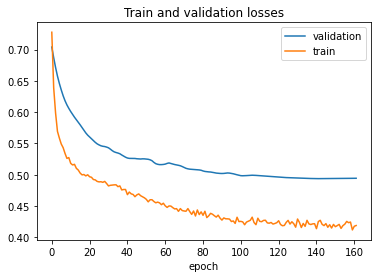

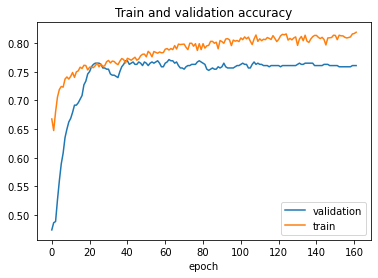

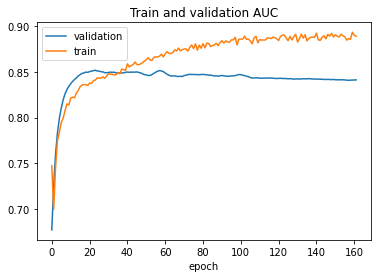

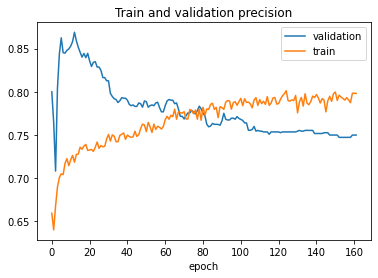

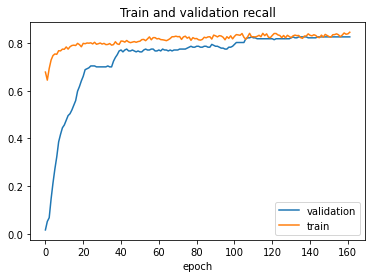

100/100 [==============================] - 1s 13ms/step - loss: 0.4318 - binary_accuracy: 0.8130 - auc_78: 0.8903 - precision_60: 0.7737 - recall_60: 0.8824


In [790]:
model = FT_Transformer3(numVar = 46, d = 4, num_heads = 4, inp_shape = (46,))
model.model().summary()

# compile model
learning_rate = 1e-3

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = False),
              metrics = metrics
             )

# define training and validation parameters
batch_size = 2048
epochs = 1000
validation_split = 0.15
validation_data = None

# define callbacks
earlyStopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
decayLR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 5, verbose = 1)
callbacks = [decayLR, earlyStopping]

# ----- train and validate model -----
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    callbacks = callbacks,
                    validation_split = validation_split,
                    shuffle = True)

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation losses")
plt.plot(history.history["val_loss"], label = "validation")
plt.plot(history.history["loss"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation accuracy")
plt.plot(history.history["val_binary_accuracy"], label = "validation")
plt.plot(history.history["binary_accuracy"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation AUC")
plt.plot(history.history["val_auc_78"], label = "validation")
plt.plot(history.history["auc_78"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation precision")
plt.plot(history.history["val_precision_60"], label = "validation")
plt.plot(history.history["precision_60"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation recall")
plt.plot(history.history["val_recall_60"], label = "validation")
plt.plot(history.history["recall_60"], label = "train")
plt.legend()
plt.show()

# evaluation
results = model.evaluate(X_train, y_train)

#### FTT3 with engineered

Model: "model_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_243 (InputLayer)       [(None, 11)]              0         
_________________________________________________________________
feature_tokenizer_154 (Featu (None, 11, 4)             528       
_________________________________________________________________
transformer_block_253 (Trans (None, 11, 4)             360       
_________________________________________________________________
transformer_block_254 (Trans (None, 11, 4)             360       
_________________________________________________________________
transformer_block_255 (Trans (None, 11, 4)             360       
_________________________________________________________________
tf.math.reduce_max_3 (TFOpLa (None, 4)                 0         
_________________________________________________________________
binary_classifier_241 (Binar (None, 1)                 21

2/2 [==============================] - 0s 88ms/step - loss: 0.5513 - binary_accuracy: 0.7415 - auc_78: 0.8158 - precision_60: 0.7281 - recall_60: 0.7609 - val_loss: 0.6242 - val_binary_accuracy: 0.6688 - val_auc_78: 0.8097 - val_precision_60: 0.6244 - val_recall_60: 0.9609
Epoch 26/1000
2/2 [==============================] - 0s 92ms/step - loss: 0.5481 - binary_accuracy: 0.7344 - auc_78: 0.8177 - precision_60: 0.7211 - recall_60: 0.7541 - val_loss: 0.6196 - val_binary_accuracy: 0.6960 - val_auc_78: 0.8136 - val_precision_60: 0.6472 - val_recall_60: 0.9531
Epoch 27/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.5407 - binary_accuracy: 0.7459 - auc_78: 0.8241 - precision_60: 0.7295 - recall_60: 0.7721 - val_loss: 0.6150 - val_binary_accuracy: 0.6981 - val_auc_78: 0.8173 - val_precision_60: 0.6489 - val_recall_60: 0.9531
Epoch 28/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.5407 - binary_accuracy: 0.7470 - auc_78: 0.8229 - precision_60: 0.7317 - r

2/2 [==============================] - 0s 92ms/step - loss: 0.5104 - binary_accuracy: 0.7544 - auc_78: 0.8362 - precision_60: 0.7335 - recall_60: 0.7901 - val_loss: 0.5275 - val_binary_accuracy: 0.7505 - val_auc_78: 0.8380 - val_precision_60: 0.7231 - val_recall_60: 0.8672
Epoch 54/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.5096 - binary_accuracy: 0.7585 - auc_78: 0.8357 - precision_60: 0.7329 - recall_60: 0.8043 - val_loss: 0.5250 - val_binary_accuracy: 0.7547 - val_auc_78: 0.8385 - val_precision_60: 0.7279 - val_recall_60: 0.8672
Epoch 55/1000
2/2 [==============================] - 0s 95ms/step - loss: 0.5072 - binary_accuracy: 0.7626 - auc_78: 0.8378 - precision_60: 0.7391 - recall_60: 0.8028 - val_loss: 0.5227 - val_binary_accuracy: 0.7589 - val_auc_78: 0.8387 - val_precision_60: 0.7327 - val_recall_60: 0.8672
Epoch 56/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.5103 - binary_accuracy: 0.7519 - auc_78: 0.8340 - precision_60: 0.7315 - r

2/2 [==============================] - 0s 92ms/step - loss: 0.4957 - binary_accuracy: 0.7663 - auc_78: 0.8410 - precision_60: 0.7383 - recall_60: 0.8163 - val_loss: 0.4913 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8423 - val_precision_60: 0.7572 - val_recall_60: 0.8164
Epoch 82/1000
2/2 [==============================] - 0s 93ms/step - loss: 0.4942 - binary_accuracy: 0.7707 - auc_78: 0.8424 - precision_60: 0.7437 - recall_60: 0.8178 - val_loss: 0.4905 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8436 - val_precision_60: 0.7572 - val_recall_60: 0.8164
Epoch 83/1000
2/2 [==============================] - 0s 98ms/step - loss: 0.4971 - binary_accuracy: 0.7578 - auc_78: 0.8399 - precision_60: 0.7329 - recall_60: 0.8021 - val_loss: 0.4898 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8437 - val_precision_60: 0.7572 - val_recall_60: 0.8164
Epoch 84/1000
2/2 [==============================] - 0s 95ms/step - loss: 0.4940 - binary_accuracy: 0.7615 - auc_78: 0.8425 - precision_60: 0.7357 - r

2/2 [==============================] - 0s 119ms/step - loss: 0.4915 - binary_accuracy: 0.7633 - auc_78: 0.8411 - precision_60: 0.7402 - recall_60: 0.8028 - val_loss: 0.4832 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8456 - val_precision_60: 0.7658 - val_recall_60: 0.8047

Epoch 00109: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 110/1000
2/2 [==============================] - 0s 109ms/step - loss: 0.4909 - binary_accuracy: 0.7600 - auc_78: 0.8420 - precision_60: 0.7353 - recall_60: 0.8036 - val_loss: 0.4830 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8460 - val_precision_60: 0.7658 - val_recall_60: 0.8047
Epoch 111/1000
2/2 [==============================] - 0s 110ms/step - loss: 0.4910 - binary_accuracy: 0.7681 - auc_78: 0.8411 - precision_60: 0.7445 - recall_60: 0.8081 - val_loss: 0.4828 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8461 - val_precision_60: 0.7658 - val_recall_60: 0.8047
Epoch 112/1000
2/2 [==============================] - 0s 103ms/s

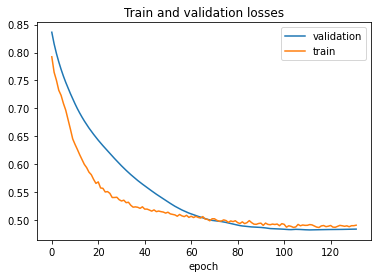

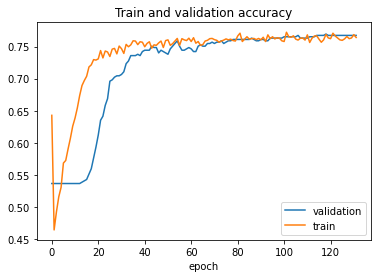

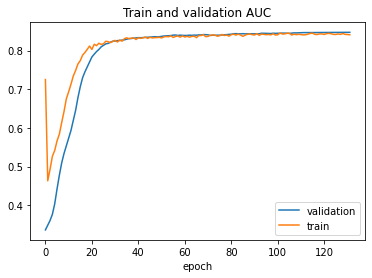

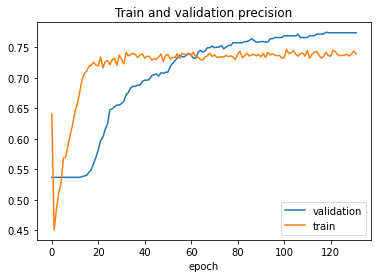

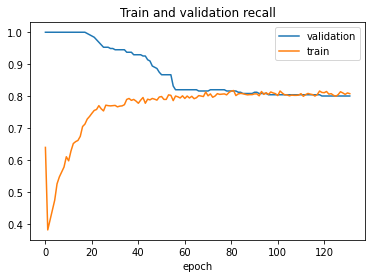

100/100 [==============================] - 0s 4ms/step - loss: 0.4837 - binary_accuracy: 0.7649 - auc_78: 0.8470 - precision_60: 0.7507 - recall_60: 0.7937


In [791]:
model = FT_Transformer3(numVar = 11, d = 4, num_heads = 4, inp_shape = (11,))
model.model().summary()

# compile model
learning_rate = 1e-3

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = False),
              metrics = metrics
             )

# define training and validation parameters
batch_size = 2048
epochs = 1000
validation_split = 0.15
validation_data = None

# define callbacks
earlyStopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
decayLR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 5, verbose = 1)
callbacks = [decayLR, earlyStopping]

# ----- train and validate model -----
history = model.fit(X_focused_train, y_focused_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    callbacks = callbacks,
                    validation_split = validation_split,
                    shuffle = True)

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation losses")
plt.plot(history.history["val_loss"], label = "validation")
plt.plot(history.history["loss"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation accuracy")
plt.plot(history.history["val_binary_accuracy"], label = "validation")
plt.plot(history.history["binary_accuracy"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation AUC")
plt.plot(history.history["val_auc_78"], label = "validation")
plt.plot(history.history["auc_78"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation precision")
plt.plot(history.history["val_precision_60"], label = "validation")
plt.plot(history.history["precision_60"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation recall")
plt.plot(history.history["val_recall_60"], label = "validation")
plt.plot(history.history["recall_60"], label = "train")
plt.legend()
plt.show()

# evaluation
results = model.evaluate(X_focused_train, y_focused_train)

#### FTT3 ensemble with base

Model: "model_104"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_246 (InputLayer)          [(None, 46)]         0                                            
__________________________________________________________________________________________________
ft__transformer3_86 (FT_Transfo (None, 1)            9749        input_246[0][0]                  
__________________________________________________________________________________________________
ft__transformer3_87 (FT_Transfo (None, 1)            9749        input_246[0][0]                  
__________________________________________________________________________________________________
tf.__operators__.add_128 (TFOpL (None, 1)            0           ft__transformer3_86[0][0]        
                                                                 ft__transformer3_87[0][0]

Epoch 19/1000
2/2 [==============================] - 5s 1s/step - loss: 0.4836 - binary_accuracy: 0.7656 - auc_78: 0.8491 - precision_60: 0.7479 - recall_60: 0.7890 - val_loss: 0.5832 - val_binary_accuracy: 0.6897 - val_auc_78: 0.8558 - val_precision_60: 0.6380 - val_recall_60: 0.9646
Epoch 20/1000
2/2 [==============================] - 5s 1s/step - loss: 0.4868 - binary_accuracy: 0.7648 - auc_78: 0.8464 - precision_60: 0.7496 - recall_60: 0.7830 - val_loss: 0.5761 - val_binary_accuracy: 0.6939 - val_auc_78: 0.8575 - val_precision_60: 0.6429 - val_recall_60: 0.9567
Epoch 21/1000
2/2 [==============================] - 5s 1s/step - loss: 0.4841 - binary_accuracy: 0.7681 - auc_78: 0.8483 - precision_60: 0.7534 - recall_60: 0.7852 - val_loss: 0.5694 - val_binary_accuracy: 0.7044 - val_auc_78: 0.8565 - val_precision_60: 0.6523 - val_recall_60: 0.9528
Epoch 22/1000
2/2 [==============================] - 5s 2s/step - loss: 0.4807 - binary_accuracy: 0.7678 - auc_78: 0.8512 - precision_60: 0.75

2/2 [==============================] - 5s 2s/step - loss: 0.4435 - binary_accuracy: 0.7844 - auc_78: 0.8777 - precision_60: 0.7674 - recall_60: 0.8056 - val_loss: 0.5289 - val_binary_accuracy: 0.7820 - val_auc_78: 0.8517 - val_precision_60: 0.8074 - val_recall_60: 0.7756
Epoch 48/1000
2/2 [==============================] - 5s 2s/step - loss: 0.4397 - binary_accuracy: 0.7911 - auc_78: 0.8804 - precision_60: 0.7747 - recall_60: 0.8109 - val_loss: 0.5292 - val_binary_accuracy: 0.7757 - val_auc_78: 0.8513 - val_precision_60: 0.8050 - val_recall_60: 0.7638
Epoch 49/1000
2/2 [==============================] - 5s 2s/step - loss: 0.4409 - binary_accuracy: 0.7937 - auc_78: 0.8795 - precision_60: 0.7766 - recall_60: 0.8146 - val_loss: 0.5295 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8510 - val_precision_60: 0.8017 - val_recall_60: 0.7480

Epoch 00049: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 00049: early stopping


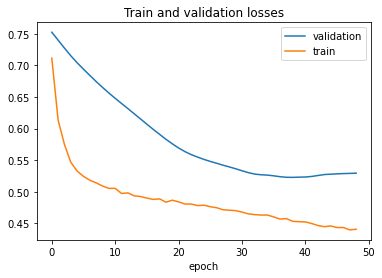

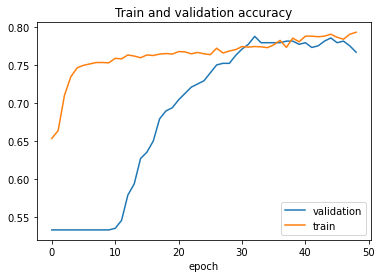

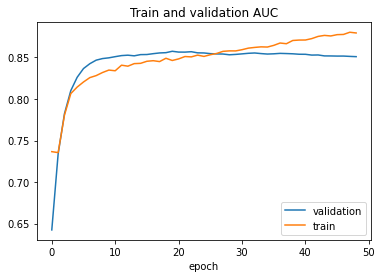

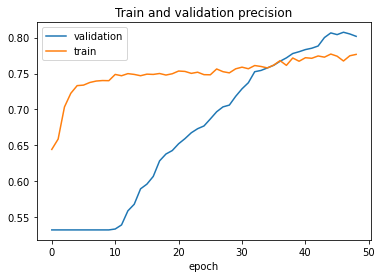

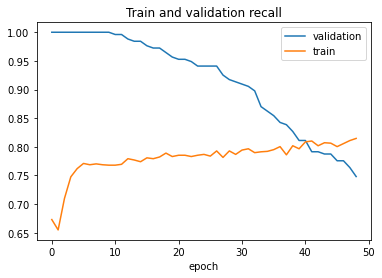

100/100 [==============================] - 5s 49ms/step - loss: 0.5112 - binary_accuracy: 0.7856 - auc_78: 0.8744 - precision_60: 0.7896 - recall_60: 0.7761


In [795]:
model = FT_Transformer3_ensemble5(numVar = 46, d = 4, num_heads = 4, inp_shape = (46,))
model.model().summary()

# compile model
learning_rate = 1e-3

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = False),
              metrics = metrics
             )

# define training and validation parameters
batch_size = 2048
epochs = 1000
validation_split = 0.15
validation_data = None

# define callbacks
earlyStopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
decayLR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 5, verbose = 1)
callbacks = [decayLR, earlyStopping]

# ----- train and validate model -----
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    callbacks = callbacks,
                    validation_split = validation_split,
                    shuffle = True)

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation losses")
plt.plot(history.history["val_loss"], label = "validation")
plt.plot(history.history["loss"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation accuracy")
plt.plot(history.history["val_binary_accuracy"], label = "validation")
plt.plot(history.history["binary_accuracy"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation AUC")
plt.plot(history.history["val_auc_78"], label = "validation")
plt.plot(history.history["auc_78"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation precision")
plt.plot(history.history["val_precision_60"], label = "validation")
plt.plot(history.history["precision_60"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation recall")
plt.plot(history.history["val_recall_60"], label = "validation")
plt.plot(history.history["recall_60"], label = "train")
plt.legend()
plt.show()

# evaluation
results = model.evaluate(X_train, y_train)

#### FTT3 ensemble with engineered data

Model: "model_103"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_245 (InputLayer)          [(None, 11)]         0                                            
__________________________________________________________________________________________________
ft__transformer3_81 (FT_Transfo (None, 1)            1629        input_245[0][0]                  
__________________________________________________________________________________________________
ft__transformer3_82 (FT_Transfo (None, 1)            1629        input_245[0][0]                  
__________________________________________________________________________________________________
tf.__operators__.add_124 (TFOpL (None, 1)            0           ft__transformer3_81[0][0]        
                                                                 ft__transformer3_82[0][0]

Epoch 19/1000
2/2 [==============================] - 1s 285ms/step - loss: 0.5226 - binary_accuracy: 0.7467 - auc_78: 0.8251 - precision_60: 0.7335 - recall_60: 0.7654 - val_loss: 0.5440 - val_binary_accuracy: 0.7505 - val_auc_78: 0.8311 - val_precision_60: 0.7528 - val_recall_60: 0.7969
Epoch 20/1000
2/2 [==============================] - 1s 279ms/step - loss: 0.5215 - binary_accuracy: 0.7478 - auc_78: 0.8253 - precision_60: 0.7314 - recall_60: 0.7736 - val_loss: 0.5400 - val_binary_accuracy: 0.7505 - val_auc_78: 0.8320 - val_precision_60: 0.7528 - val_recall_60: 0.7969
Epoch 21/1000
2/2 [==============================] - 1s 280ms/step - loss: 0.5187 - binary_accuracy: 0.7485 - auc_78: 0.8272 - precision_60: 0.7324 - recall_60: 0.7736 - val_loss: 0.5364 - val_binary_accuracy: 0.7484 - val_auc_78: 0.8324 - val_precision_60: 0.7519 - val_recall_60: 0.7930
Epoch 22/1000
2/2 [==============================] - 1s 288ms/step - loss: 0.5154 - binary_accuracy: 0.7481 - auc_78: 0.8300 - precis

2/2 [==============================] - 1s 293ms/step - loss: 0.4940 - binary_accuracy: 0.7600 - auc_78: 0.8412 - precision_60: 0.7415 - recall_60: 0.7894 - val_loss: 0.5014 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8442 - val_precision_60: 0.7795 - val_recall_60: 0.7734
Epoch 48/1000
2/2 [==============================] - 1s 285ms/step - loss: 0.4945 - binary_accuracy: 0.7615 - auc_78: 0.8403 - precision_60: 0.7403 - recall_60: 0.7969 - val_loss: 0.5005 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8441 - val_precision_60: 0.7826 - val_recall_60: 0.7734
Epoch 49/1000
2/2 [==============================] - 1s 286ms/step - loss: 0.4953 - binary_accuracy: 0.7600 - auc_78: 0.8398 - precision_60: 0.7385 - recall_60: 0.7961 - val_loss: 0.4996 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8452 - val_precision_60: 0.7826 - val_recall_60: 0.7734
Epoch 50/1000
2/2 [==============================] - 1s 290ms/step - loss: 0.4905 - binary_accuracy: 0.7644 - auc_78: 0.8434 - precision_60: 0.7458

2/2 [==============================] - 1s 322ms/step - loss: 0.4869 - binary_accuracy: 0.7644 - auc_78: 0.8439 - precision_60: 0.7424 - recall_60: 0.8013 - val_loss: 0.4912 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8491 - val_precision_60: 0.7871 - val_recall_60: 0.7656
Epoch 76/1000
2/2 [==============================] - 1s 276ms/step - loss: 0.4869 - binary_accuracy: 0.7615 - auc_78: 0.8436 - precision_60: 0.7409 - recall_60: 0.7954 - val_loss: 0.4913 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8489 - val_precision_60: 0.7871 - val_recall_60: 0.7656
Epoch 77/1000
2/2 [==============================] - 1s 284ms/step - loss: 0.4862 - binary_accuracy: 0.7656 - auc_78: 0.8445 - precision_60: 0.7443 - recall_60: 0.8006 - val_loss: 0.4913 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8491 - val_precision_60: 0.7871 - val_recall_60: 0.7656
Epoch 78/1000
2/2 [==============================] - 1s 285ms/step - loss: 0.4843 - binary_accuracy: 0.7656 - auc_78: 0.8468 - precision_60: 0.7449

2/2 [==============================] - 1s 303ms/step - loss: 0.4836 - binary_accuracy: 0.7685 - auc_78: 0.8463 - precision_60: 0.7450 - recall_60: 0.8081 - val_loss: 0.4861 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8517 - val_precision_60: 0.7826 - val_recall_60: 0.7734
Epoch 104/1000
2/2 [==============================] - 1s 288ms/step - loss: 0.4857 - binary_accuracy: 0.7674 - auc_78: 0.8449 - precision_60: 0.7455 - recall_60: 0.8036 - val_loss: 0.4861 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8518 - val_precision_60: 0.7826 - val_recall_60: 0.7734
Epoch 105/1000
2/2 [==============================] - 1s 290ms/step - loss: 0.4876 - binary_accuracy: 0.7667 - auc_78: 0.8433 - precision_60: 0.7438 - recall_60: 0.8051 - val_loss: 0.4861 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8514 - val_precision_60: 0.7826 - val_recall_60: 0.7734
Epoch 106/1000
2/2 [==============================] - 1s 319ms/step - loss: 0.4845 - binary_accuracy: 0.7744 - auc_78: 0.8455 - precision_60: 0.7

Epoch 131/1000
2/2 [==============================] - 1s 306ms/step - loss: 0.4824 - binary_accuracy: 0.7715 - auc_78: 0.8475 - precision_60: 0.7495 - recall_60: 0.8073 - val_loss: 0.4852 - val_binary_accuracy: 0.7736 - val_auc_78: 0.8509 - val_precision_60: 0.7846 - val_recall_60: 0.7969
Epoch 132/1000
2/2 [==============================] - 1s 310ms/step - loss: 0.4853 - binary_accuracy: 0.7711 - auc_78: 0.8449 - precision_60: 0.7493 - recall_60: 0.8066 - val_loss: 0.4851 - val_binary_accuracy: 0.7736 - val_auc_78: 0.8511 - val_precision_60: 0.7846 - val_recall_60: 0.7969
Epoch 133/1000
2/2 [==============================] - 1s 315ms/step - loss: 0.4824 - binary_accuracy: 0.7722 - auc_78: 0.8472 - precision_60: 0.7516 - recall_60: 0.8051 - val_loss: 0.4851 - val_binary_accuracy: 0.7736 - val_auc_78: 0.8511 - val_precision_60: 0.7846 - val_recall_60: 0.7969
Epoch 134/1000
2/2 [==============================] - 1s 319ms/step - loss: 0.4855 - binary_accuracy: 0.7630 - auc_78: 0.8439 - pr

Epoch 159/1000
2/2 [==============================] - 1s 303ms/step - loss: 0.4872 - binary_accuracy: 0.7622 - auc_78: 0.8433 - precision_60: 0.7399 - recall_60: 0.7999 - val_loss: 0.4837 - val_binary_accuracy: 0.7715 - val_auc_78: 0.8510 - val_precision_60: 0.7774 - val_recall_60: 0.8047
Epoch 160/1000
2/2 [==============================] - 1s 324ms/step - loss: 0.4847 - binary_accuracy: 0.7641 - auc_78: 0.8454 - precision_60: 0.7415 - recall_60: 0.8021 - val_loss: 0.4837 - val_binary_accuracy: 0.7715 - val_auc_78: 0.8511 - val_precision_60: 0.7774 - val_recall_60: 0.8047
Epoch 161/1000
2/2 [==============================] - 1s 322ms/step - loss: 0.4860 - binary_accuracy: 0.7704 - auc_78: 0.8440 - precision_60: 0.7486 - recall_60: 0.8058 - val_loss: 0.4836 - val_binary_accuracy: 0.7715 - val_auc_78: 0.8511 - val_precision_60: 0.7774 - val_recall_60: 0.8047
Epoch 162/1000
2/2 [==============================] - 1s 321ms/step - loss: 0.4862 - binary_accuracy: 0.7633 - auc_78: 0.8439 - pr

2/2 [==============================] - 1s 295ms/step - loss: 0.4836 - binary_accuracy: 0.7659 - auc_78: 0.8460 - precision_60: 0.7434 - recall_60: 0.8036 - val_loss: 0.4834 - val_binary_accuracy: 0.7715 - val_auc_78: 0.8505 - val_precision_60: 0.7753 - val_recall_60: 0.8086
Epoch 187/1000
2/2 [==============================] - 1s 301ms/step - loss: 0.4833 - binary_accuracy: 0.7693 - auc_78: 0.8467 - precision_60: 0.7484 - recall_60: 0.8028 - val_loss: 0.4834 - val_binary_accuracy: 0.7715 - val_auc_78: 0.8505 - val_precision_60: 0.7753 - val_recall_60: 0.8086
Epoch 188/1000
2/2 [==============================] - 1s 289ms/step - loss: 0.4843 - binary_accuracy: 0.7733 - auc_78: 0.8462 - precision_60: 0.7510 - recall_60: 0.8096 - val_loss: 0.4834 - val_binary_accuracy: 0.7715 - val_auc_78: 0.8505 - val_precision_60: 0.7753 - val_recall_60: 0.8086

Epoch 00188: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
Epoch 189/1000
2/2 [==============================] - 1s 293ms/

2/2 [==============================] - 1s 297ms/step - loss: 0.4857 - binary_accuracy: 0.7648 - auc_78: 0.8443 - precision_60: 0.7422 - recall_60: 0.8028 - val_loss: 0.4833 - val_binary_accuracy: 0.7715 - val_auc_78: 0.8505 - val_precision_60: 0.7753 - val_recall_60: 0.8086
Epoch 214/1000
2/2 [==============================] - 1s 296ms/step - loss: 0.4847 - binary_accuracy: 0.7648 - auc_78: 0.8456 - precision_60: 0.7425 - recall_60: 0.8021 - val_loss: 0.4833 - val_binary_accuracy: 0.7715 - val_auc_78: 0.8504 - val_precision_60: 0.7753 - val_recall_60: 0.8086
Epoch 215/1000
2/2 [==============================] - 1s 294ms/step - loss: 0.4863 - binary_accuracy: 0.7656 - auc_78: 0.8442 - precision_60: 0.7467 - recall_60: 0.7954 - val_loss: 0.4833 - val_binary_accuracy: 0.7715 - val_auc_78: 0.8505 - val_precision_60: 0.7753 - val_recall_60: 0.8086
Epoch 216/1000
2/2 [==============================] - 1s 302ms/step - loss: 0.4837 - binary_accuracy: 0.7715 - auc_78: 0.8459 - precision_60: 0.7

2/2 [==============================] - 1s 282ms/step - loss: 0.4842 - binary_accuracy: 0.7652 - auc_78: 0.8460 - precision_60: 0.7448 - recall_60: 0.7984 - val_loss: 0.4832 - val_binary_accuracy: 0.7736 - val_auc_78: 0.8506 - val_precision_60: 0.7782 - val_recall_60: 0.8086
Epoch 241/1000
2/2 [==============================] - 1s 283ms/step - loss: 0.4852 - binary_accuracy: 0.7693 - auc_78: 0.8448 - precision_60: 0.7484 - recall_60: 0.8028 - val_loss: 0.4832 - val_binary_accuracy: 0.7736 - val_auc_78: 0.8505 - val_precision_60: 0.7782 - val_recall_60: 0.8086
Epoch 242/1000
2/2 [==============================] - 1s 291ms/step - loss: 0.4847 - binary_accuracy: 0.7667 - auc_78: 0.8455 - precision_60: 0.7438 - recall_60: 0.8051 - val_loss: 0.4832 - val_binary_accuracy: 0.7736 - val_auc_78: 0.8507 - val_precision_60: 0.7782 - val_recall_60: 0.8086

Epoch 00242: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.
Epoch 243/1000
2/2 [==============================] - 1s 293ms/s

Epoch 267/1000
2/2 [==============================] - 1s 284ms/step - loss: 0.4826 - binary_accuracy: 0.7696 - auc_78: 0.8470 - precision_60: 0.7490 - recall_60: 0.8028 - val_loss: 0.4831 - val_binary_accuracy: 0.7778 - val_auc_78: 0.8505 - val_precision_60: 0.7799 - val_recall_60: 0.8164

Epoch 00267: ReduceLROnPlateau reducing learning rate to 1.1920929521291868e-10.
Epoch 268/1000
2/2 [==============================] - 1s 285ms/step - loss: 0.4832 - binary_accuracy: 0.7685 - auc_78: 0.8466 - precision_60: 0.7464 - recall_60: 0.8051 - val_loss: 0.4831 - val_binary_accuracy: 0.7778 - val_auc_78: 0.8506 - val_precision_60: 0.7799 - val_recall_60: 0.8164
Epoch 269/1000
2/2 [==============================] - 1s 280ms/step - loss: 0.4830 - binary_accuracy: 0.7674 - auc_78: 0.8464 - precision_60: 0.7475 - recall_60: 0.7991 - val_loss: 0.4831 - val_binary_accuracy: 0.7778 - val_auc_78: 0.8506 - val_precision_60: 0.7799 - val_recall_60: 0.8164
Epoch 270/1000
2/2 [============================

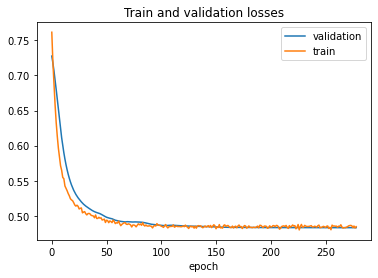

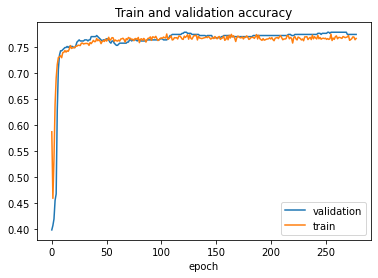

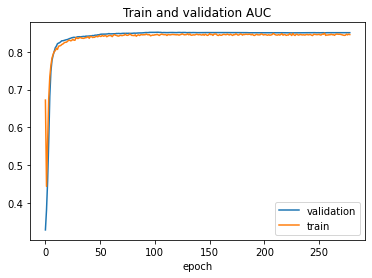

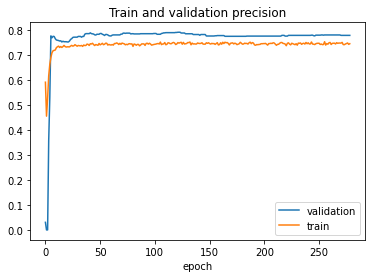

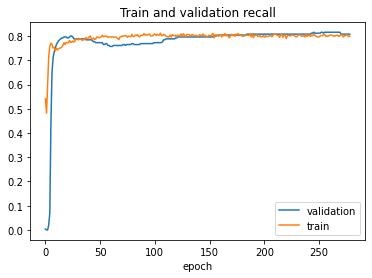

100/100 [==============================] - 1s 9ms/step - loss: 0.4821 - binary_accuracy: 0.7683 - auc_78: 0.8492 - precision_60: 0.7518 - recall_60: 0.8019


In [794]:
model = FT_Transformer3_ensemble5(numVar = 11, d = 4, num_heads = 4, inp_shape = (11,))
model.model().summary()

# compile model
learning_rate = 1e-3

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = False),
              metrics = metrics
             )

# define training and validation parameters
batch_size = 2048
epochs = 1000
validation_split = 0.15
validation_data = None

# define callbacks
earlyStopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
decayLR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 5, verbose = 1)
callbacks = [decayLR, earlyStopping]

# ----- train and validate model -----
history = model.fit(X_focused_train, y_focused_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    callbacks = callbacks,
                    validation_split = validation_split,
                    shuffle = True)

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation losses")
plt.plot(history.history["val_loss"], label = "validation")
plt.plot(history.history["loss"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation accuracy")
plt.plot(history.history["val_binary_accuracy"], label = "validation")
plt.plot(history.history["binary_accuracy"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation AUC")
plt.plot(history.history["val_auc_78"], label = "validation")
plt.plot(history.history["auc_78"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation precision")
plt.plot(history.history["val_precision_60"], label = "validation")
plt.plot(history.history["precision_60"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation recall")
plt.plot(history.history["val_recall_60"], label = "validation")
plt.plot(history.history["recall_60"], label = "train")
plt.legend()
plt.show()

# evaluation
results = model.evaluate(X_focused_train, y_focused_train)

## DNNs and GBDT ensemble
### GBDT

In [820]:
from xgboost import XGBRegressor

[0]	validation_0-logloss:0.67661	validation_1-logloss:0.67754
[1]	validation_0-logloss:0.66326	validation_1-logloss:0.66448
[2]	validation_0-logloss:0.64934	validation_1-logloss:0.65102
[3]	validation_0-logloss:0.63772	validation_1-logloss:0.64080
[4]	validation_0-logloss:0.62564	validation_1-logloss:0.62967
[5]	validation_0-logloss:0.61510	validation_1-logloss:0.61963
[6]	validation_0-logloss:0.60519	validation_1-logloss:0.61075
[7]	validation_0-logloss:0.59691	validation_1-logloss:0.60280
[8]	validation_0-logloss:0.58847	validation_1-logloss:0.59503
[9]	validation_0-logloss:0.58073	validation_1-logloss:0.58820
[10]	validation_0-logloss:0.57427	validation_1-logloss:0.58156
[11]	validation_0-logloss:0.56774	validation_1-logloss:0.57508
[12]	validation_0-logloss:0.56193	validation_1-logloss:0.56956
[13]	validation_0-logloss:0.55599	validation_1-logloss:0.56439
[14]	validation_0-logloss:0.55061	validation_1-logloss:0.55978
[15]	validation_0-logloss:0.54599	validation_1-logloss:0.55551
[1

<AxesSubplot:>

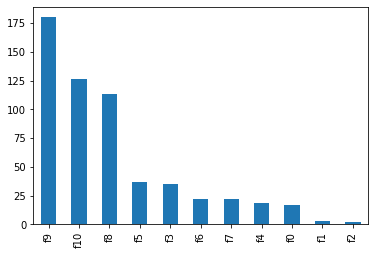

In [829]:
learning_rate = 0.05
n_estimators = 110
max_depth = 3
min_child_weight = 4
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
objective = 'binary:logistic'
scale_pos_weight = 1

model_gbdt = XGBClassifier(use_label_encoder = False, 
                    learning_rate = learning_rate,
                    n_estimators = n_estimators,
                    max_depth = max_depth,
                    min_child_weight = min_child_weight,
                    gamma = gamma,
                    subsample = subsample,
                    colsample_bytree = colsample_bytree,
                    objective = objective,
                    scale_pos_weight = scale_pos_weight)

# fit
early_stopping_rounds = 15
model_gbdt.fit(X_focused_train, y_focused_train,
          early_stopping_rounds = early_stopping_rounds,
          eval_set = [(X_focused_train, y_focused_train), (X_focused_test, y_focused_test)],
          eval_metric = ['logloss'], 
          verbose = True)

# predictions and evaluation
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
y_pred = np.round(model_gbdt.predict(X_focused_test))
y_pred_train = np.round(model_gbdt.predict(X_focused_train))
print(f'test accuracy {accuracy_score(y_focused_test, y_pred)}')
print(f'test AUC {roc_auc_score(y_focused_test, y_pred)}')
print(f'test precision {precision_score(y_focused_test, y_pred)}')
print(f'test recall {recall_score(y_focused_test, y_pred)}')

print(f'train accuracy {accuracy_score(y_focused_train, y_pred_train)}')
print(f'train AUC {roc_auc_score(y_focused_train, y_pred_train)}')
print(f'train precision {precision_score(y_focused_train, y_pred_train)}')
print(f'train recall {recall_score(y_focused_train, y_pred_train)}')


pd.Series(model_gbdt.get_booster().get_fscore()).sort_values(ascending = False).plot(kind = 'bar')

### FTT3 ensemble

Model: "model_107"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_249 (InputLayer)          [(None, 11)]         0                                            
__________________________________________________________________________________________________
ft__transformer3_96 (FT_Transfo (None, 1)            1629        input_249[0][0]                  
__________________________________________________________________________________________________
ft__transformer3_97 (FT_Transfo (None, 1)            1629        input_249[0][0]                  
__________________________________________________________________________________________________
tf.__operators__.add_136 (TFOpL (None, 1)            0           ft__transformer3_96[0][0]        
                                                                 ft__transformer3_97[0][0]

Epoch 19/1000
2/2 [==============================] - 1s 268ms/step - loss: 0.4970 - binary_accuracy: 0.7607 - auc_78: 0.8385 - precision_60: 0.7299 - recall_60: 0.8186 - val_loss: 0.5346 - val_binary_accuracy: 0.7547 - val_auc_78: 0.8316 - val_precision_60: 0.7584 - val_recall_60: 0.7969
Epoch 20/1000
2/2 [==============================] - 1s 265ms/step - loss: 0.5000 - binary_accuracy: 0.7604 - auc_78: 0.8353 - precision_60: 0.7307 - recall_60: 0.8156 - val_loss: 0.5319 - val_binary_accuracy: 0.7568 - val_auc_78: 0.8336 - val_precision_60: 0.7574 - val_recall_60: 0.8047
Epoch 21/1000
2/2 [==============================] - 1s 256ms/step - loss: 0.4944 - binary_accuracy: 0.7626 - auc_78: 0.8396 - precision_60: 0.7368 - recall_60: 0.8081 - val_loss: 0.5295 - val_binary_accuracy: 0.7568 - val_auc_78: 0.8345 - val_precision_60: 0.7574 - val_recall_60: 0.8047
Epoch 22/1000
2/2 [==============================] - 1s 260ms/step - loss: 0.4956 - binary_accuracy: 0.7585 - auc_78: 0.8388 - precis

2/2 [==============================] - 1s 273ms/step - loss: 0.4859 - binary_accuracy: 0.7667 - auc_78: 0.8445 - precision_60: 0.7414 - recall_60: 0.8103 - val_loss: 0.5022 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8391 - val_precision_60: 0.7698 - val_recall_60: 0.7969
Epoch 48/1000
2/2 [==============================] - 1s 271ms/step - loss: 0.4861 - binary_accuracy: 0.7707 - auc_78: 0.8442 - precision_60: 0.7450 - recall_60: 0.8148 - val_loss: 0.5016 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8397 - val_precision_60: 0.7689 - val_recall_60: 0.7930
Epoch 49/1000
2/2 [==============================] - 1s 264ms/step - loss: 0.4877 - binary_accuracy: 0.7637 - auc_78: 0.8424 - precision_60: 0.7387 - recall_60: 0.8073 - val_loss: 0.5013 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8392 - val_precision_60: 0.7698 - val_recall_60: 0.7969
Epoch 50/1000
2/2 [==============================] - 1s 257ms/step - loss: 0.4858 - binary_accuracy: 0.7667 - auc_78: 0.8439 - precision_60: 0.7404

2/2 [==============================] - 1s 342ms/step - loss: 0.4885 - binary_accuracy: 0.7596 - auc_78: 0.8420 - precision_60: 0.7316 - recall_60: 0.8111 - val_loss: 0.4910 - val_binary_accuracy: 0.7673 - val_auc_78: 0.8423 - val_precision_60: 0.7757 - val_recall_60: 0.7969
Epoch 76/1000
2/2 [==============================] - 1s 336ms/step - loss: 0.4821 - binary_accuracy: 0.7659 - auc_78: 0.8474 - precision_60: 0.7368 - recall_60: 0.8186 - val_loss: 0.4908 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8424 - val_precision_60: 0.7719 - val_recall_60: 0.7930
Epoch 77/1000
2/2 [==============================] - 1s 366ms/step - loss: 0.4837 - binary_accuracy: 0.7663 - auc_78: 0.8458 - precision_60: 0.7412 - recall_60: 0.8096 - val_loss: 0.4905 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8425 - val_precision_60: 0.7689 - val_recall_60: 0.7930
Epoch 78/1000
2/2 [==============================] - 1s 314ms/step - loss: 0.4851 - binary_accuracy: 0.7626 - auc_78: 0.8443 - precision_60: 0.7365

2/2 [==============================] - 1s 324ms/step - loss: 0.4838 - binary_accuracy: 0.7667 - auc_78: 0.8453 - precision_60: 0.7378 - recall_60: 0.8186 - val_loss: 0.4881 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8431 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 104/1000
2/2 [==============================] - 1s 311ms/step - loss: 0.4828 - binary_accuracy: 0.7667 - auc_78: 0.8457 - precision_60: 0.7424 - recall_60: 0.8081 - val_loss: 0.4879 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8436 - val_precision_60: 0.7719 - val_recall_60: 0.7930
Epoch 105/1000
2/2 [==============================] - 1s 333ms/step - loss: 0.4826 - binary_accuracy: 0.7670 - auc_78: 0.8463 - precision_60: 0.7390 - recall_60: 0.8171 - val_loss: 0.4877 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8437 - val_precision_60: 0.7719 - val_recall_60: 0.7930
Epoch 106/1000
2/2 [==============================] - 1s 308ms/step - loss: 0.4842 - binary_accuracy: 0.7600 - auc_78: 0.8450 - precision_60: 0.7

2/2 [==============================] - 1s 328ms/step - loss: 0.4808 - binary_accuracy: 0.7637 - auc_78: 0.8476 - precision_60: 0.7358 - recall_60: 0.8141 - val_loss: 0.4854 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8440 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 132/1000
2/2 [==============================] - 1s 337ms/step - loss: 0.4840 - binary_accuracy: 0.7704 - auc_78: 0.8455 - precision_60: 0.7425 - recall_60: 0.8193 - val_loss: 0.4853 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8439 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 133/1000
2/2 [==============================] - 1s 359ms/step - loss: 0.4833 - binary_accuracy: 0.7633 - auc_78: 0.8449 - precision_60: 0.7337 - recall_60: 0.8178 - val_loss: 0.4853 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8441 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 134/1000
2/2 [==============================] - 1s 361ms/step - loss: 0.4786 - binary_accuracy: 0.7722 - auc_78: 0.8491 - precision_60: 0.7

2/2 [==============================] - 1s 327ms/step - loss: 0.4837 - binary_accuracy: 0.7685 - auc_78: 0.8451 - precision_60: 0.7416 - recall_60: 0.8156 - val_loss: 0.4832 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8459 - val_precision_60: 0.7739 - val_recall_60: 0.7891
Epoch 160/1000
2/2 [==============================] - 1s 322ms/step - loss: 0.4799 - binary_accuracy: 0.7667 - auc_78: 0.8486 - precision_60: 0.7382 - recall_60: 0.8178 - val_loss: 0.4832 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8461 - val_precision_60: 0.7739 - val_recall_60: 0.7891
Epoch 161/1000
2/2 [==============================] - 1s 338ms/step - loss: 0.4821 - binary_accuracy: 0.7715 - auc_78: 0.8467 - precision_60: 0.7440 - recall_60: 0.8193 - val_loss: 0.4831 - val_binary_accuracy: 0.7631 - val_auc_78: 0.8459 - val_precision_60: 0.7739 - val_recall_60: 0.7891
Epoch 162/1000
2/2 [==============================] - 1s 325ms/step - loss: 0.4791 - binary_accuracy: 0.7715 - auc_78: 0.8491 - precision_60: 0.7

2/2 [==============================] - 1s 309ms/step - loss: 0.4808 - binary_accuracy: 0.7659 - auc_78: 0.8475 - precision_60: 0.7375 - recall_60: 0.8171 - val_loss: 0.4820 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8467 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 188/1000
2/2 [==============================] - 1s 308ms/step - loss: 0.4823 - binary_accuracy: 0.7656 - auc_78: 0.8458 - precision_60: 0.7376 - recall_60: 0.8156 - val_loss: 0.4820 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8469 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 189/1000
2/2 [==============================] - 1s 305ms/step - loss: 0.4809 - binary_accuracy: 0.7659 - auc_78: 0.8466 - precision_60: 0.7385 - recall_60: 0.8148 - val_loss: 0.4821 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8469 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 190/1000
2/2 [==============================] - 1s 313ms/step - loss: 0.4806 - binary_accuracy: 0.7685 - auc_78: 0.8469 - precision_60: 0.7

2/2 [==============================] - 1s 306ms/step - loss: 0.4827 - binary_accuracy: 0.7681 - auc_78: 0.8455 - precision_60: 0.7411 - recall_60: 0.8156 - val_loss: 0.4818 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8471 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 215/1000
2/2 [==============================] - 1s 307ms/step - loss: 0.4829 - binary_accuracy: 0.7659 - auc_78: 0.8459 - precision_60: 0.7381 - recall_60: 0.8156 - val_loss: 0.4818 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8469 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 216/1000
2/2 [==============================] - 1s 308ms/step - loss: 0.4810 - binary_accuracy: 0.7652 - auc_78: 0.8476 - precision_60: 0.7349 - recall_60: 0.8208 - val_loss: 0.4818 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8469 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 217/1000
2/2 [==============================] - 1s 318ms/step - loss: 0.4814 - binary_accuracy: 0.7678 - auc_78: 0.8465 - precision_60: 0.7

2/2 [==============================] - 1s 319ms/step - loss: 0.4816 - binary_accuracy: 0.7674 - auc_78: 0.8465 - precision_60: 0.7398 - recall_60: 0.8163 - val_loss: 0.4815 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8468 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 242/1000
2/2 [==============================] - 1s 318ms/step - loss: 0.4782 - binary_accuracy: 0.7670 - auc_78: 0.8490 - precision_60: 0.7416 - recall_60: 0.8111 - val_loss: 0.4815 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8469 - val_precision_60: 0.7710 - val_recall_60: 0.7891

Epoch 00242: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.
Epoch 243/1000
2/2 [==============================] - 1s 303ms/step - loss: 0.4813 - binary_accuracy: 0.7678 - auc_78: 0.8472 - precision_60: 0.7387 - recall_60: 0.8201 - val_loss: 0.4815 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8470 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 244/1000
2/2 [==============================] - 1s 332ms/s

2/2 [==============================] - 1s 306ms/step - loss: 0.4849 - binary_accuracy: 0.7644 - auc_78: 0.8449 - precision_60: 0.7387 - recall_60: 0.8096 - val_loss: 0.4813 - val_binary_accuracy: 0.7589 - val_auc_78: 0.8472 - val_precision_60: 0.7681 - val_recall_60: 0.7891

Epoch 00268: ReduceLROnPlateau reducing learning rate to 7.629394893626795e-09.
Epoch 269/1000
2/2 [==============================] - 1s 302ms/step - loss: 0.4804 - binary_accuracy: 0.7693 - auc_78: 0.8474 - precision_60: 0.7394 - recall_60: 0.8231 - val_loss: 0.4813 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8470 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 270/1000
2/2 [==============================] - 1s 304ms/step - loss: 0.4798 - binary_accuracy: 0.7678 - auc_78: 0.8484 - precision_60: 0.7403 - recall_60: 0.8163 - val_loss: 0.4813 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8470 - val_precision_60: 0.7710 - val_recall_60: 0.7891
Epoch 271/1000
2/2 [==============================] - 1s 305ms/s

Epoch 295/1000
2/2 [==============================] - 1s 343ms/step - loss: 0.4828 - binary_accuracy: 0.7641 - auc_78: 0.8463 - precision_60: 0.7344 - recall_60: 0.8186 - val_loss: 0.4812 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8475 - val_precision_60: 0.7689 - val_recall_60: 0.7930
Epoch 296/1000
2/2 [==============================] - 1s 362ms/step - loss: 0.4805 - binary_accuracy: 0.7719 - auc_78: 0.8480 - precision_60: 0.7413 - recall_60: 0.8268 - val_loss: 0.4811 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8473 - val_precision_60: 0.7689 - val_recall_60: 0.7930
Epoch 297/1000
2/2 [==============================] - 1s 340ms/step - loss: 0.4846 - binary_accuracy: 0.7648 - auc_78: 0.8443 - precision_60: 0.7369 - recall_60: 0.8148 - val_loss: 0.4811 - val_binary_accuracy: 0.7610 - val_auc_78: 0.8474 - val_precision_60: 0.7689 - val_recall_60: 0.7930
Epoch 298/1000
2/2 [==============================] - 1s 327ms/step - loss: 0.4798 - binary_accuracy: 0.7685 - auc_78: 0.8483 - pr

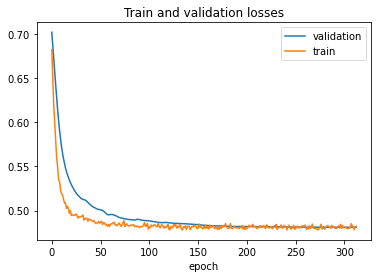

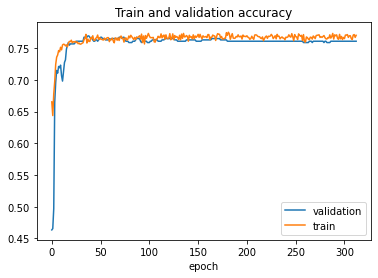

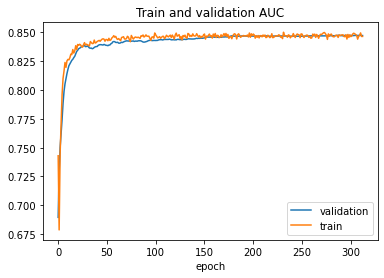

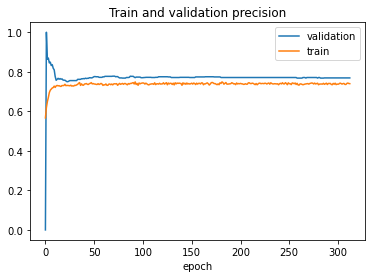

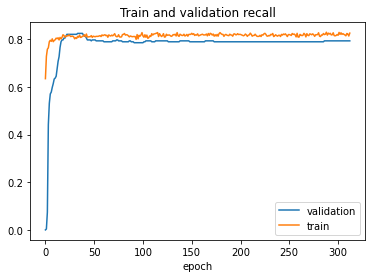

100/100 [==============================] - 1s 10ms/step - loss: 0.4774 - binary_accuracy: 0.7671 - auc_78: 0.8503 - precision_60: 0.7524 - recall_60: 0.7969


In [804]:
model_dnn = FT_Transformer3_ensemble5(numVar = 11, d = 4, num_heads = 4, inp_shape = (11,))
model_dnn.model().summary()

# compile model
learning_rate = 1e-3

model_dnn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = False),
              metrics = metrics
             )

# define training and validation parameters
batch_size = 2048
epochs = 1000
validation_split = 0.15
validation_data = None

# define callbacks
earlyStopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
decayLR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 5, verbose = 1)
callbacks = [decayLR, earlyStopping]

# ----- train and validate model -----
history = model_dnn.fit(X_focused_train, y_focused_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    callbacks = callbacks,
                    validation_split = validation_split,
                    shuffle = True)

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation losses")
plt.plot(history.history["val_loss"], label = "validation")
plt.plot(history.history["loss"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation accuracy")
plt.plot(history.history["val_binary_accuracy"], label = "validation")
plt.plot(history.history["binary_accuracy"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation AUC")
plt.plot(history.history["val_auc_78"], label = "validation")
plt.plot(history.history["auc_78"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation precision")
plt.plot(history.history["val_precision_60"], label = "validation")
plt.plot(history.history["precision_60"], label = "train")
plt.legend()
plt.show()

plt.figure()
plt.xlabel("epoch")
plt.title("Train and validation recall")
plt.plot(history.history["val_recall_60"], label = "validation")
plt.plot(history.history["recall_60"], label = "train")
plt.legend()
plt.show()

# evaluation
results = model_dnn.evaluate(X_focused_train, y_focused_train)

In [830]:
# weight by their val loss
gbdt_weight = 0.49554
dnn_weight = 0.4774 

# weighted prediction
y_pred_gbdt = np.round(model_gbdt.predict(X_focused_test))
y_pred_dnn = np.round(model_dnn.predict(X_focused_test)[:,0])
y_pred = gbdt_weight * y_pred_gbdt + dnn_weight * y_pred_dnn

y_pred = np.round(y_pred)
y_pred_dnn = np.round(y_pred_dnn)
y_pred_gbdt = np.round(y_pred_gbdt)

# individual evaluations
print("##### GDBT #####")
print(f'test accuracy {accuracy_score(y_focused_test, y_pred_gbdt)}')
print(f'test AUC {roc_auc_score(y_focused_test, y_pred_gbdt)}')
print(f'test precision {precision_score(y_focused_test, y_pred_gbdt)}')
print(f'test recall {recall_score(y_focused_test, y_pred_gbdt)}')

print("\n##### DNN #####")
print(f'test accuracy {accuracy_score(y_focused_test, y_pred_dnn)}')
print(f'test AUC {roc_auc_score(y_focused_test, y_pred_dnn)}')
print(f'test precision {precision_score(y_focused_test, y_pred_dnn)}')
print(f'test recall {recall_score(y_focused_test, y_pred_dnn)}')

print("\n##### Ensemble #####")
print(f'test accuracy {accuracy_score(y_focused_test, y_pred)}')
print(f'test AUC {roc_auc_score(y_focused_test, y_pred)}')
print(f'test precision {precision_score(y_focused_test, y_pred)}')
print(f'test recall {recall_score(y_focused_test, y_pred)}')

##### GDBT #####
test accuracy 0.7629233511586453
test AUC 0.7630786242659956
test precision 0.7466216216216216
test recall 0.7921146953405018

##### DNN #####
test accuracy 0.7647058823529411
test AUC 0.7648135438114848
test precision 0.7525773195876289
test recall 0.7849462365591398

##### Ensemble #####
test accuracy 0.7664884135472371
test AUC 0.7664340730572714
test precision 0.7700729927007299
test recall 0.7562724014336918


# Conclusions
In this notebook, we looked through the data, did some basic balancing and standardization and developed and tuned tree-based and deep learning models for tabular data from the telco data set. We also explored if appropriately picking features would be useful. 

It appears that choosing features wisely can help gradient boosted trees pick out more salient features marginally, but not very significantly. 

Deep learning networks - ResNet and Transformer based designs here are competitive with gradient boosted trees, but do not offer any significant advantage over simpler tree models, it seems. Ensemble methods, consistent with literature, do appear to boost DNN performance and reduce overfitting. 

Unfortunately, despite my best efforts at tuning and exploring different approaches, the best prediction performance across all three models ranges around 78% accuracy, precision and recall. 

# What's next
I will use the models developed here and deploy them using FastAPI. 